L’analyse de Data Drift à l’aide d’evidently

Création du rapport_data_drift...
Exécution du rapport_data_drift...
Temps écoulé : 39.99 secondes
Le rapport de dérive des données enregistré sous : 'rapport_data_drift.html'


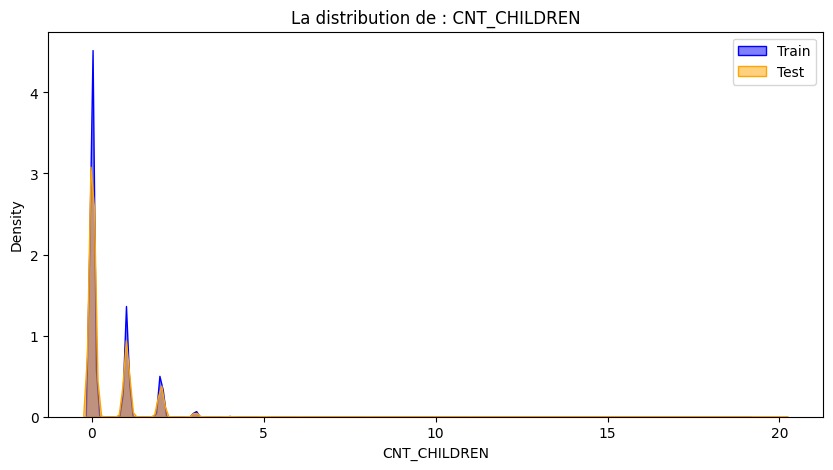

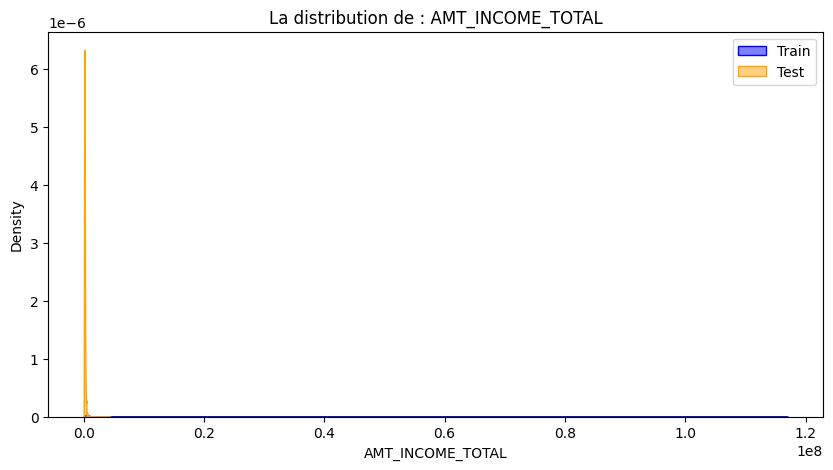

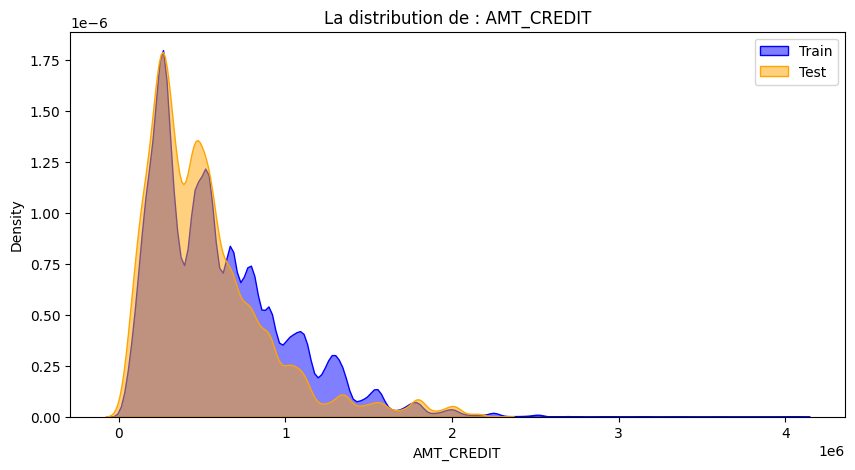

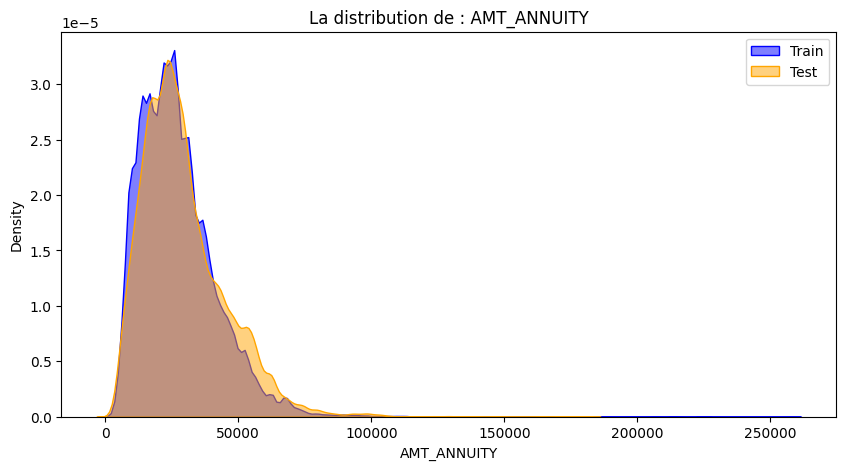

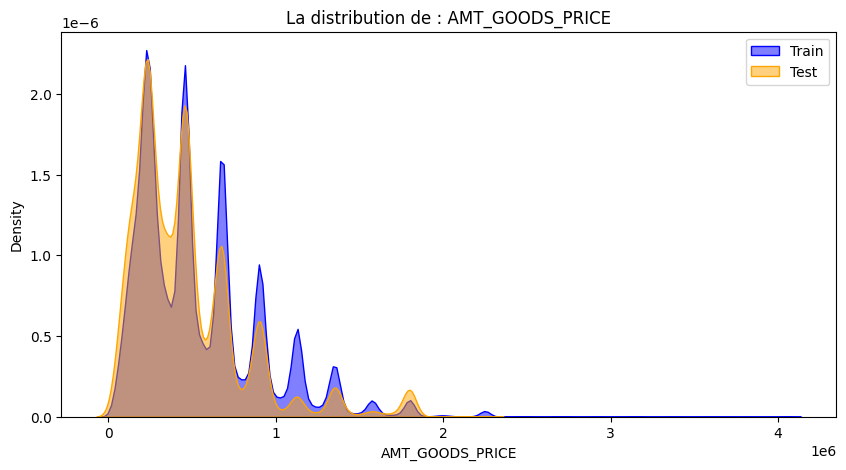

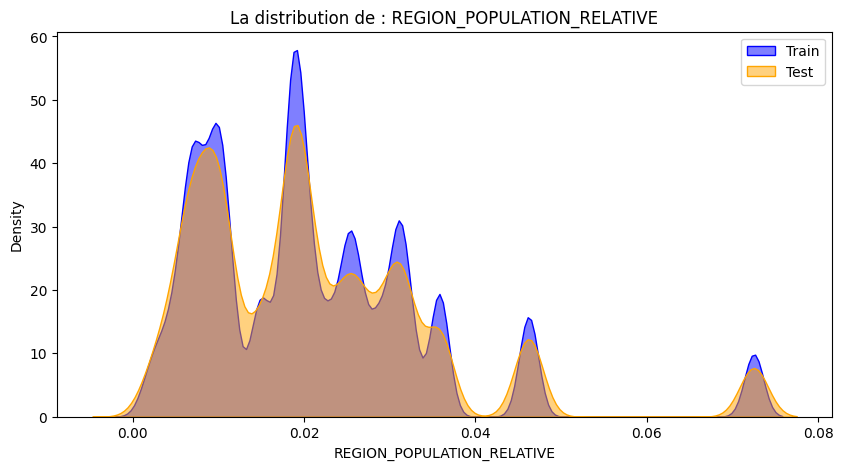

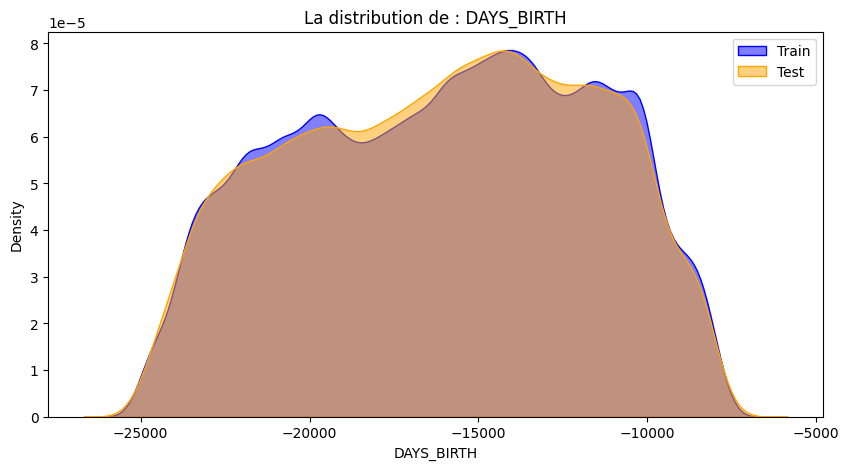

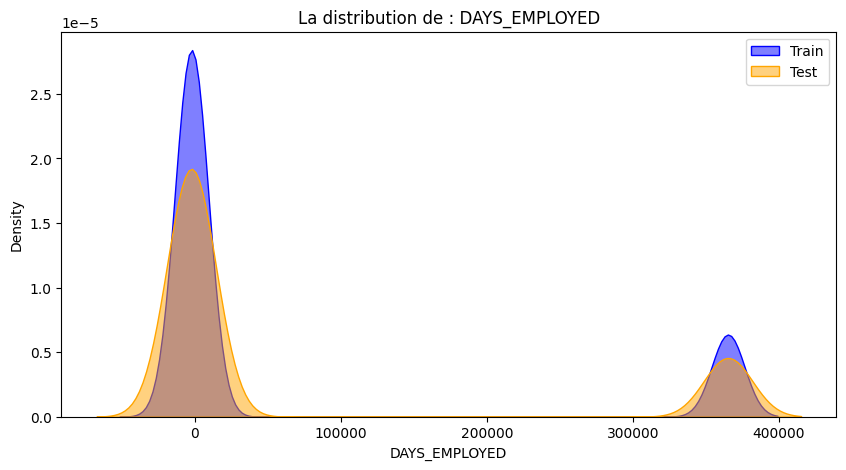

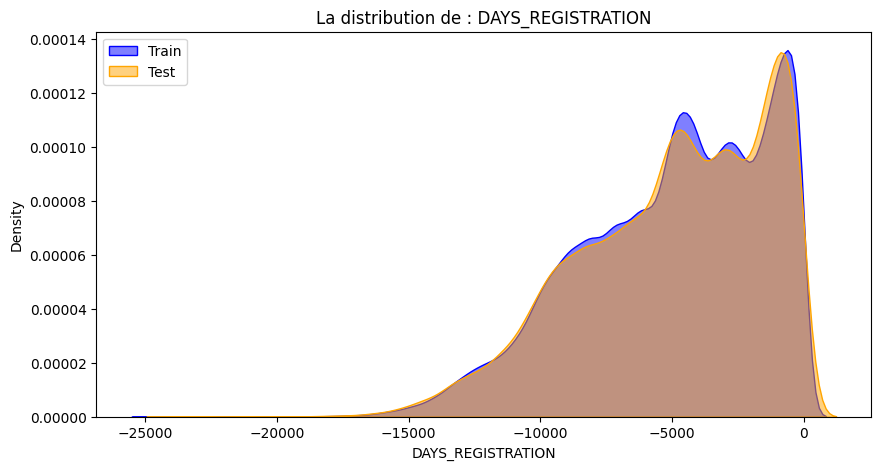

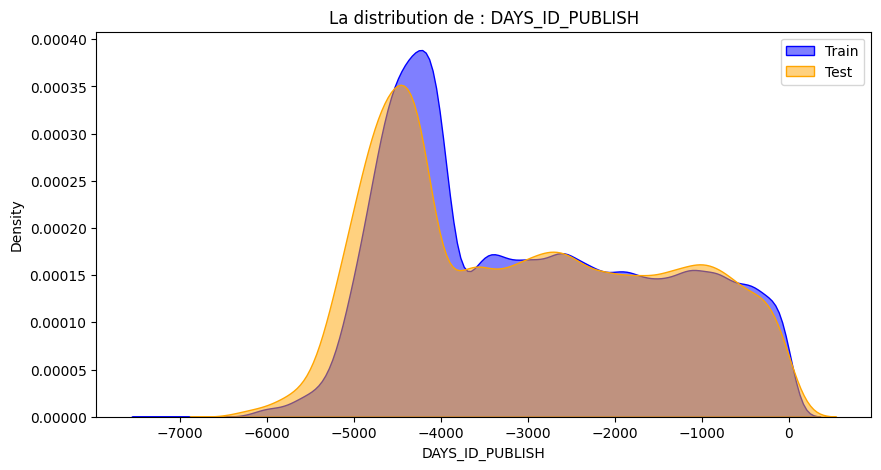

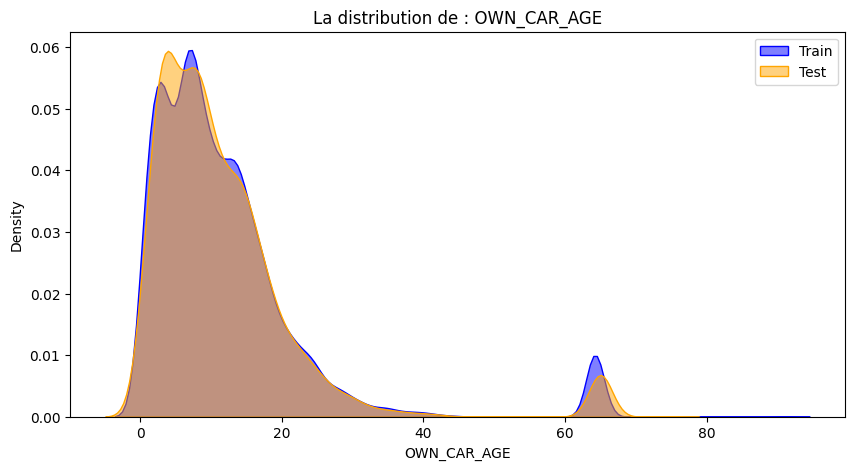

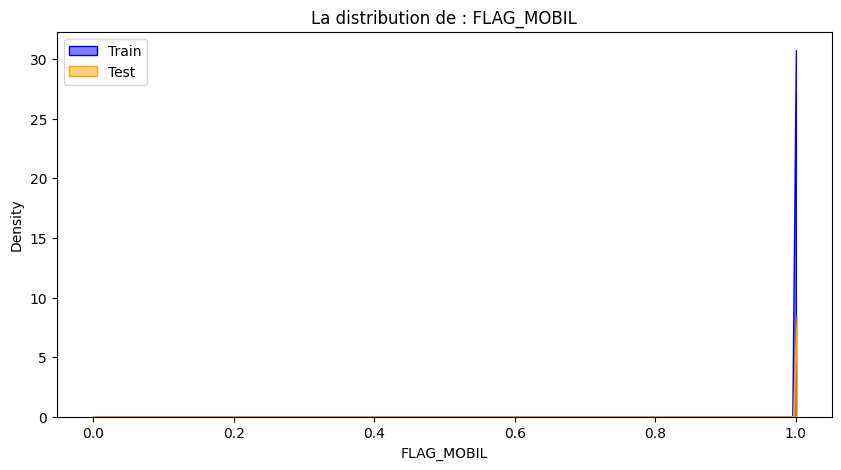

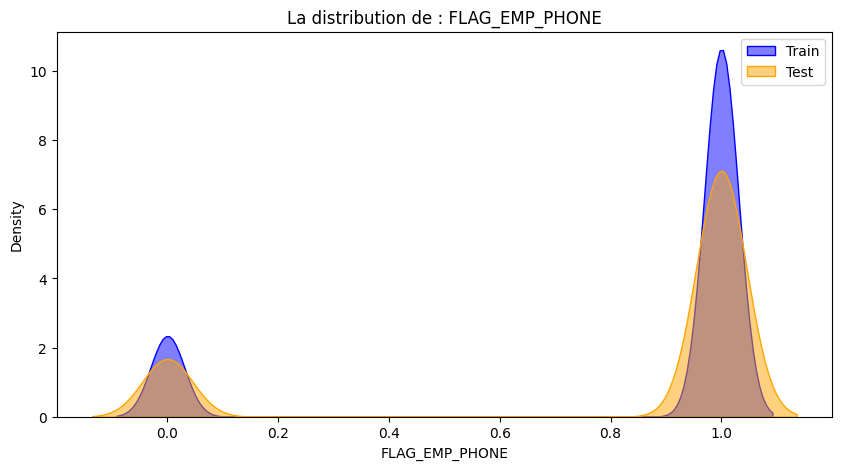

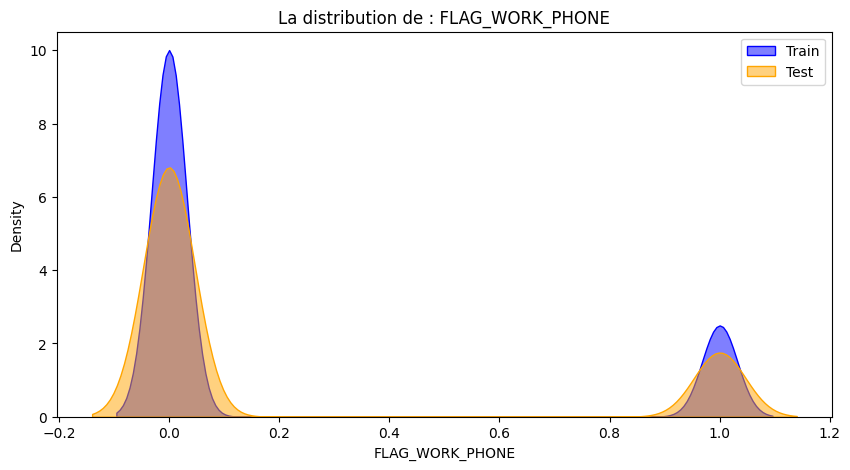

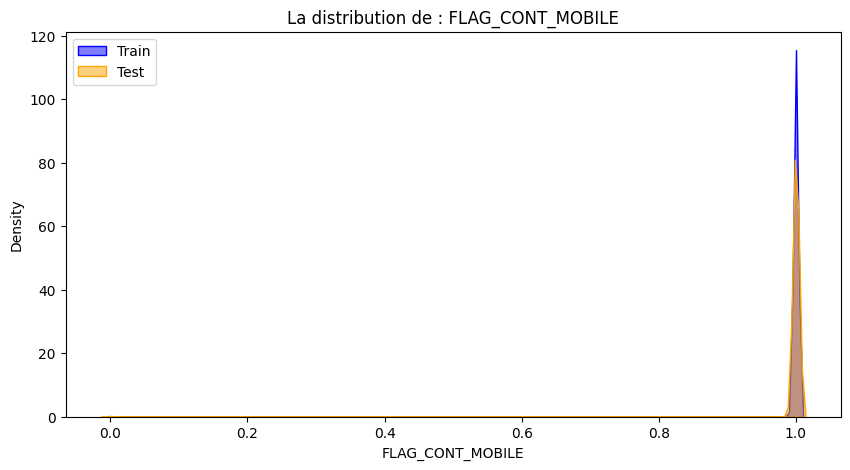

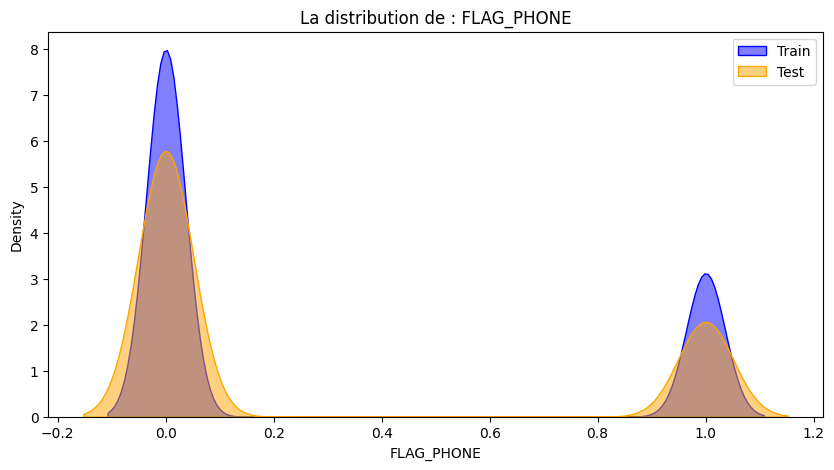

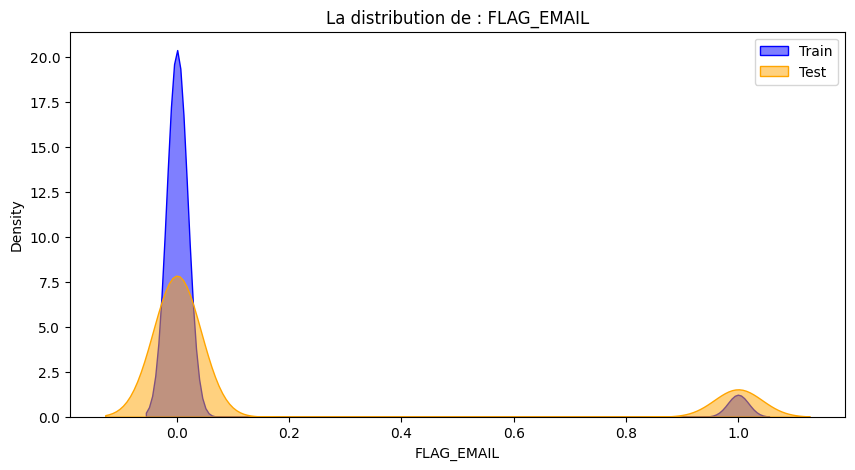

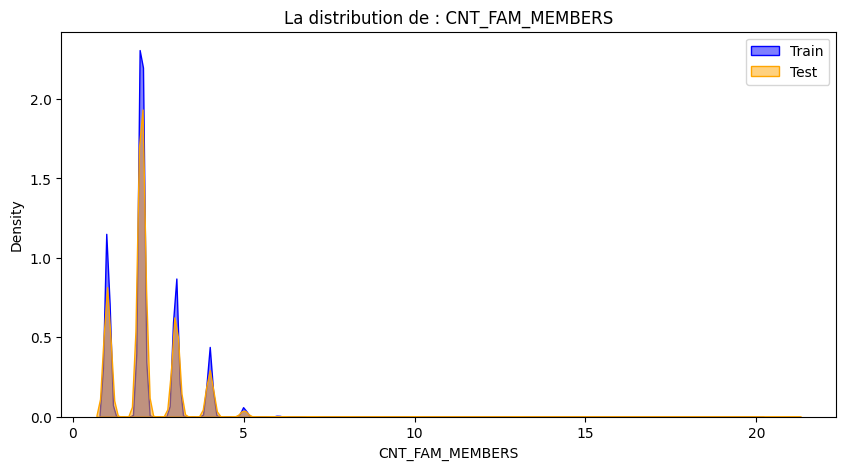

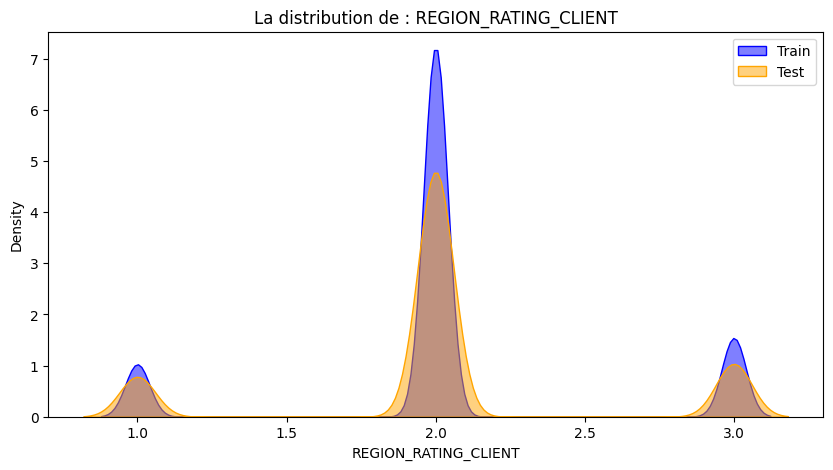

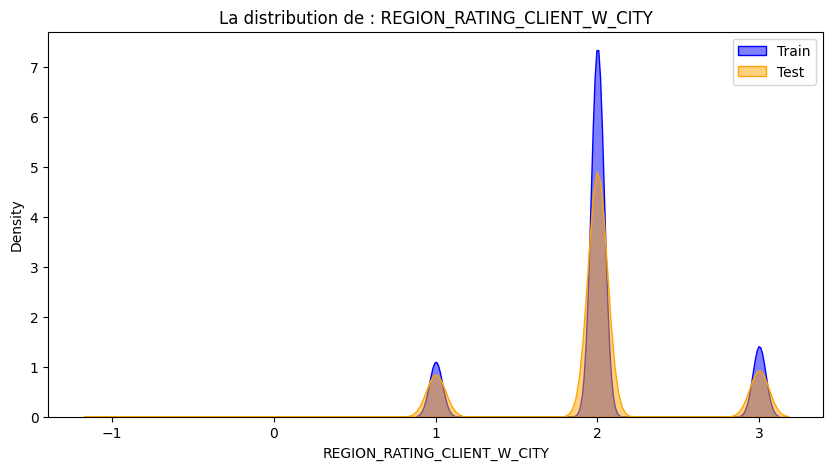

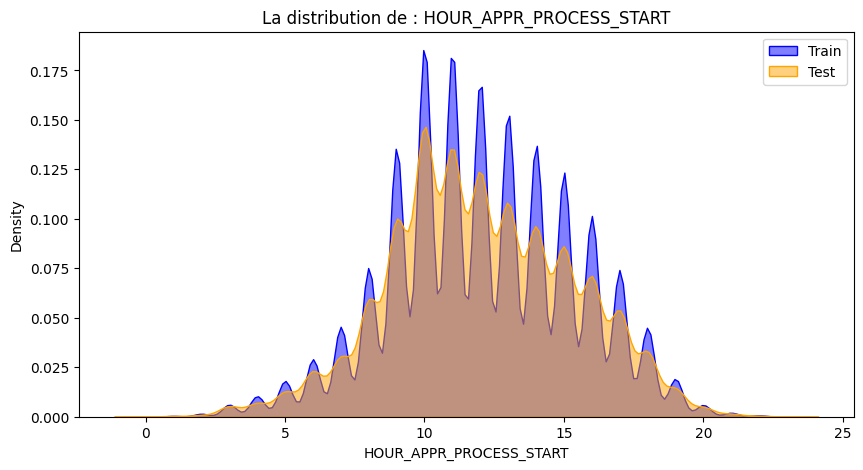

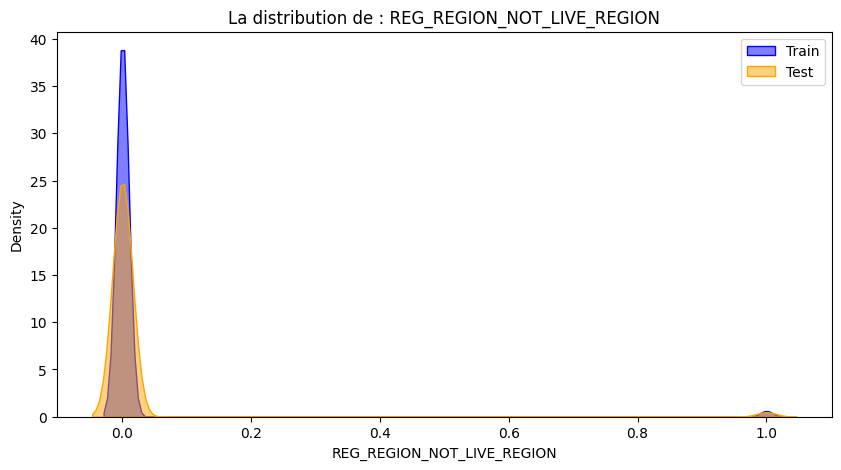

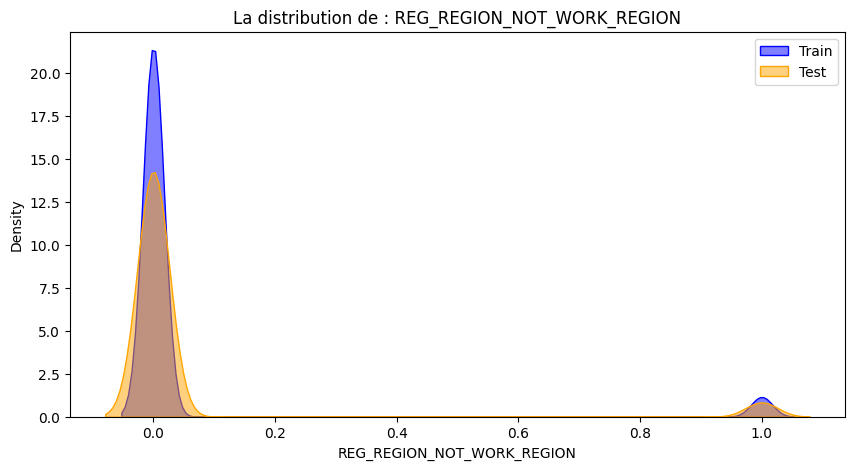

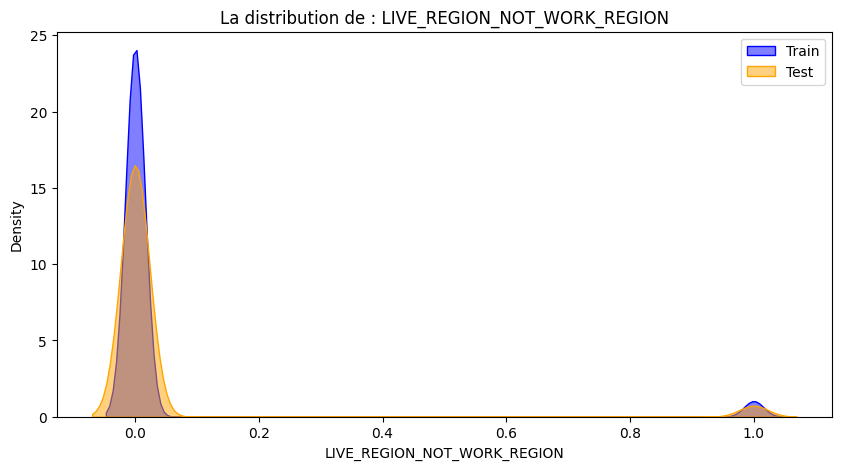

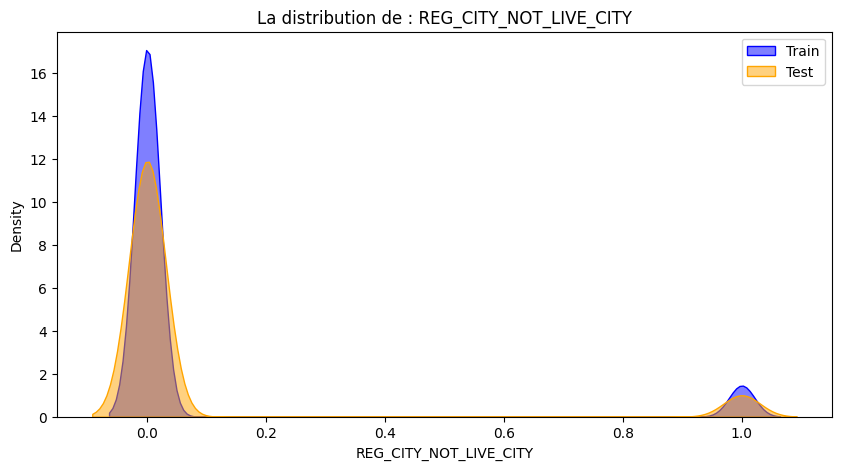

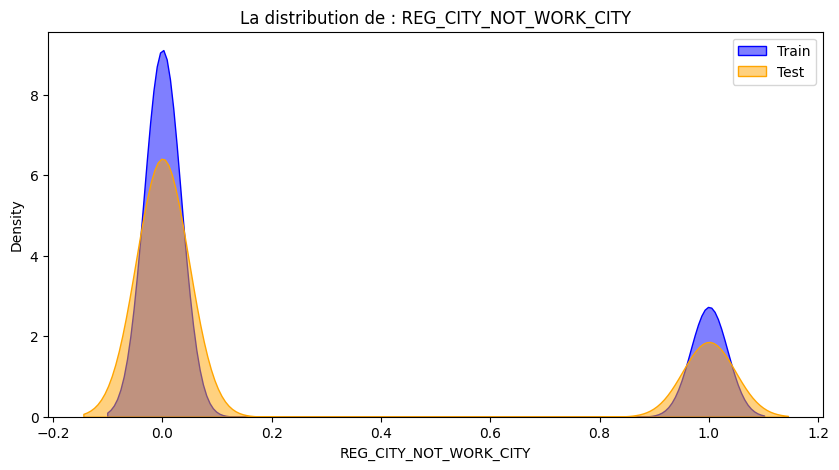

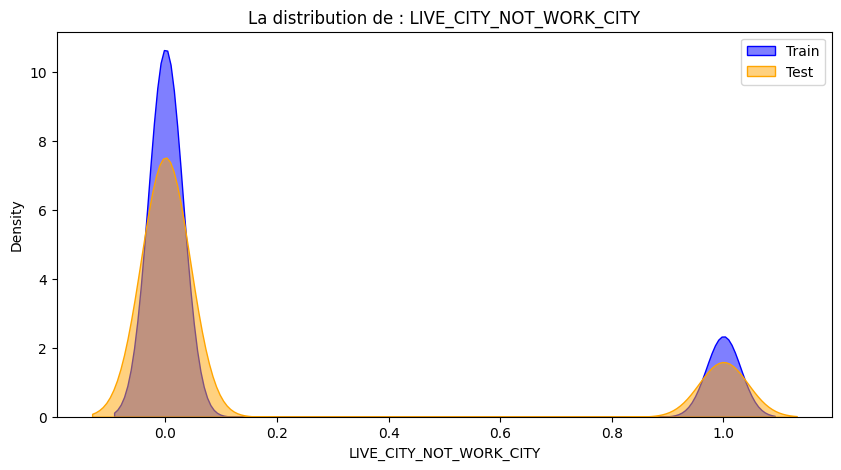

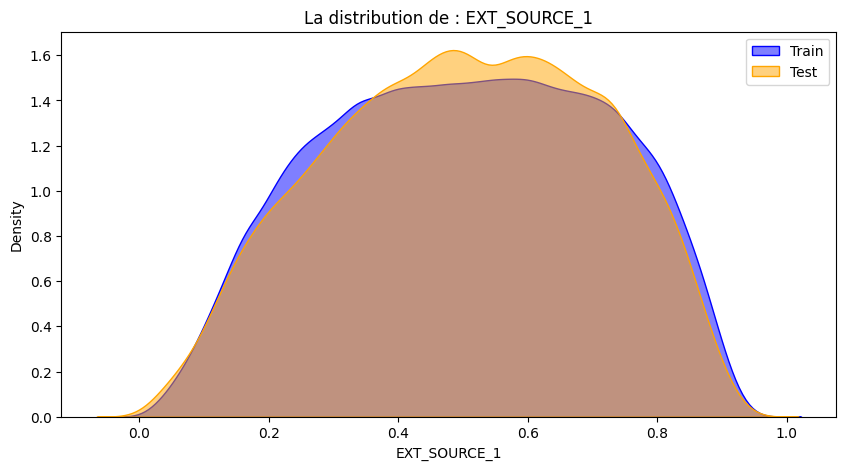

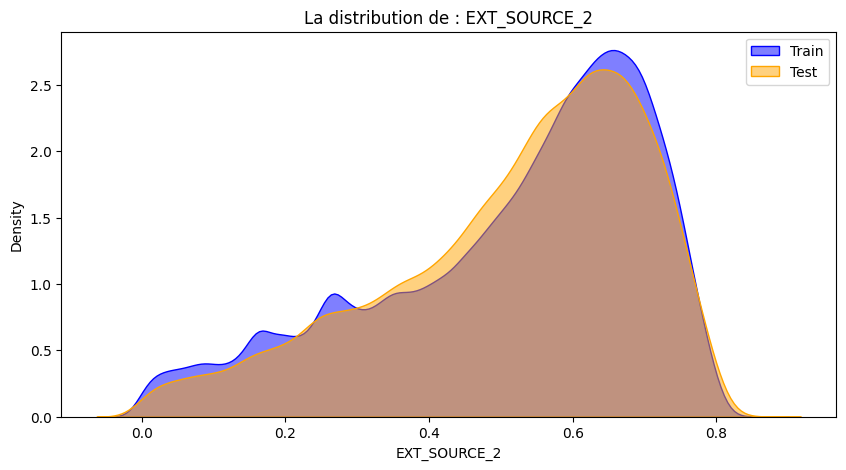

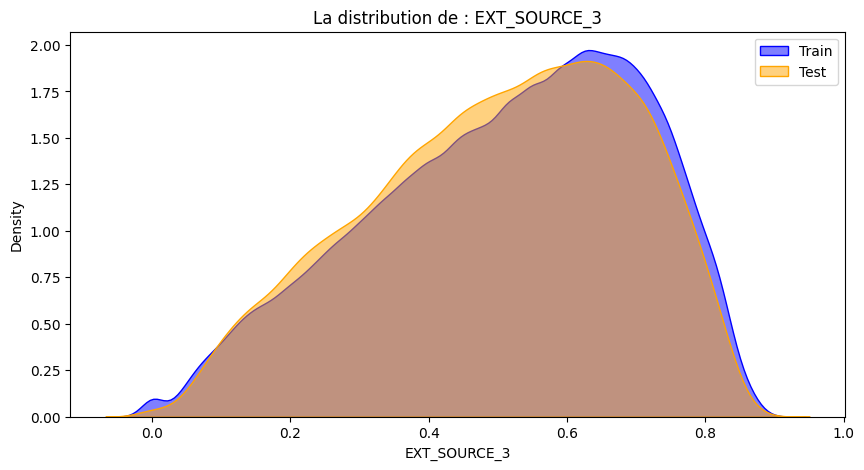

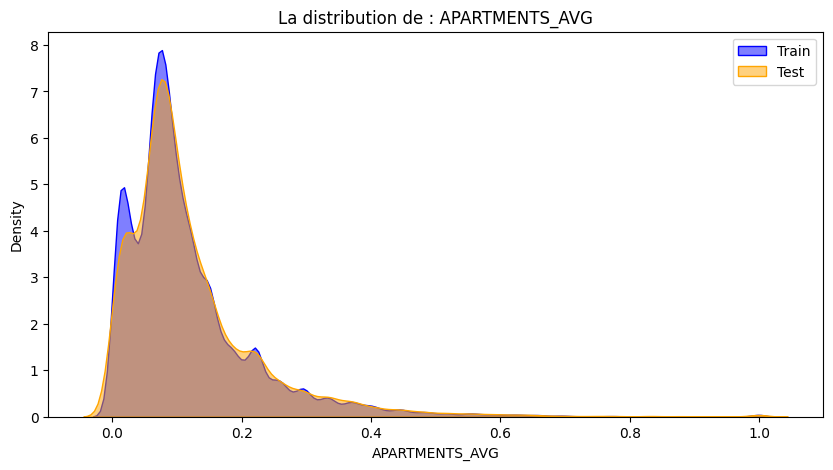

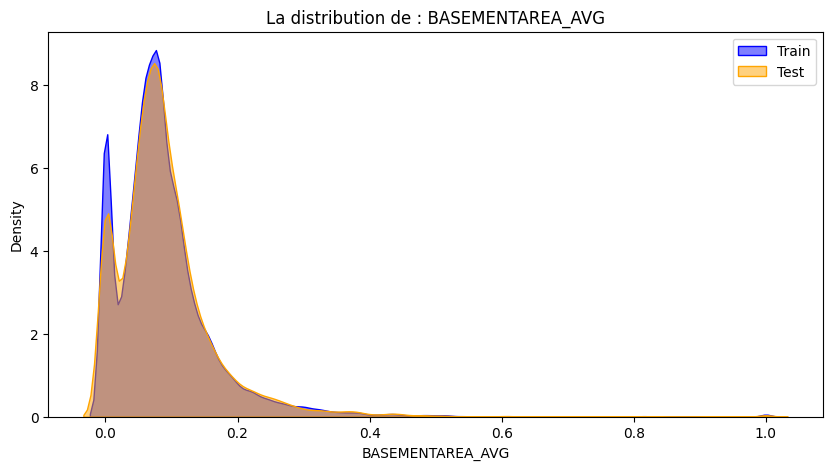

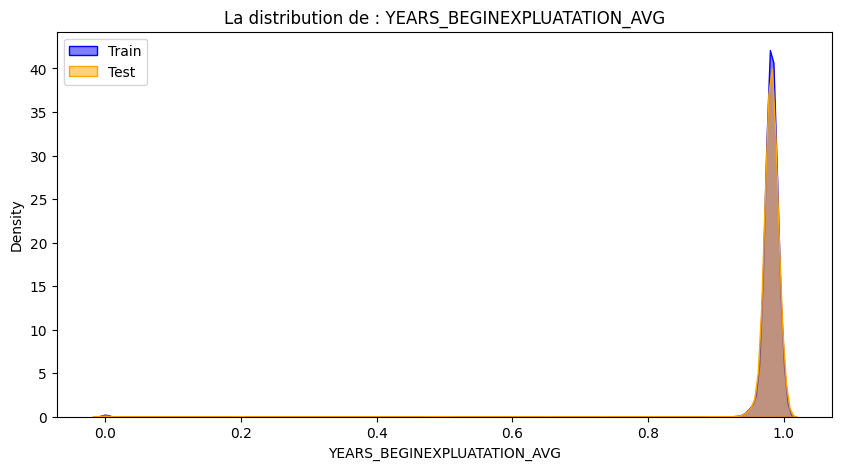

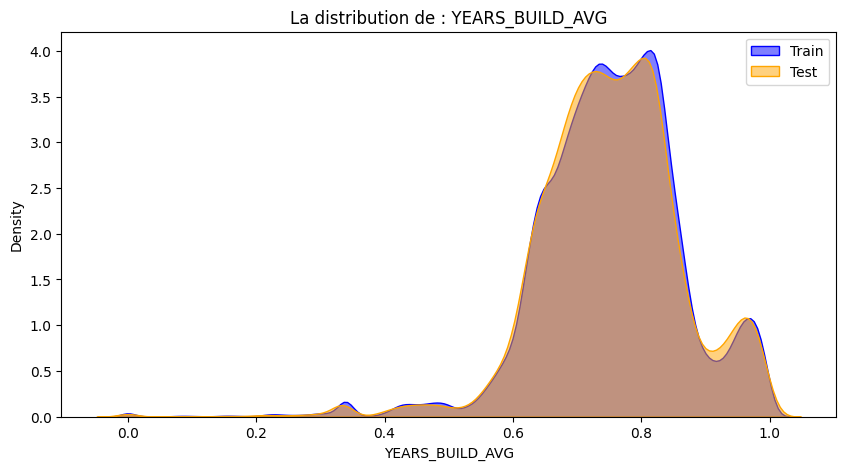

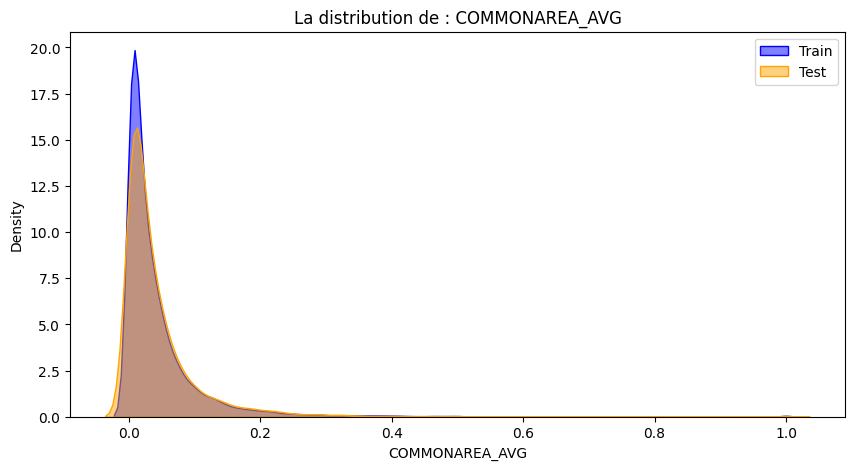

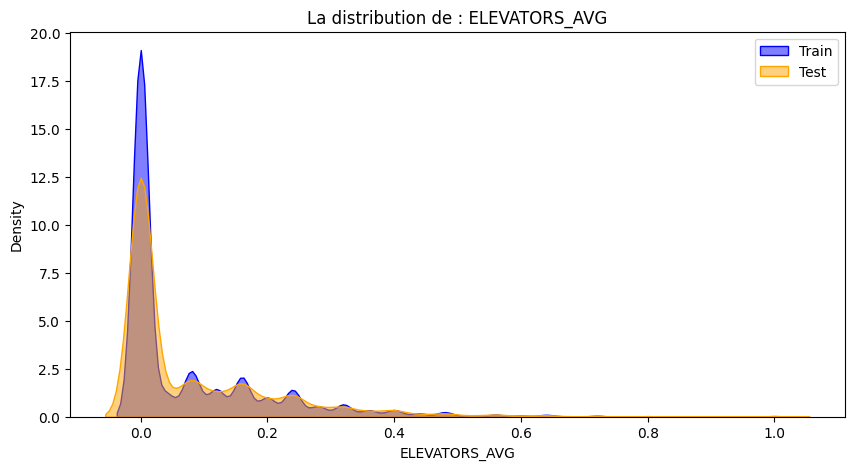

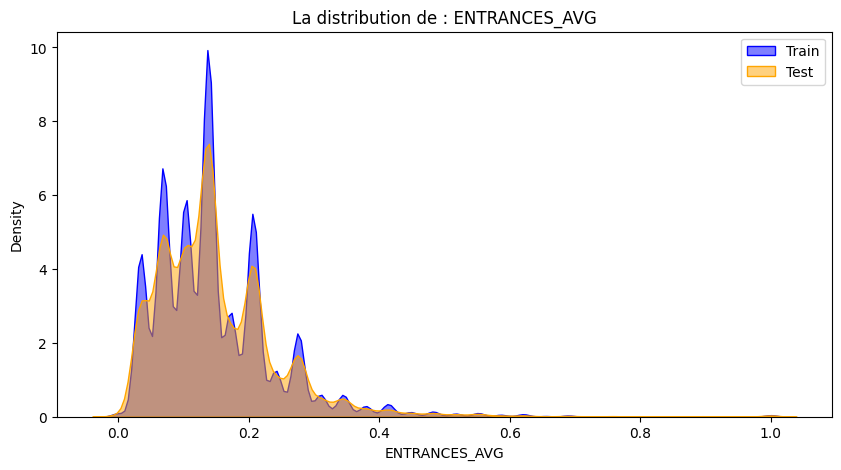

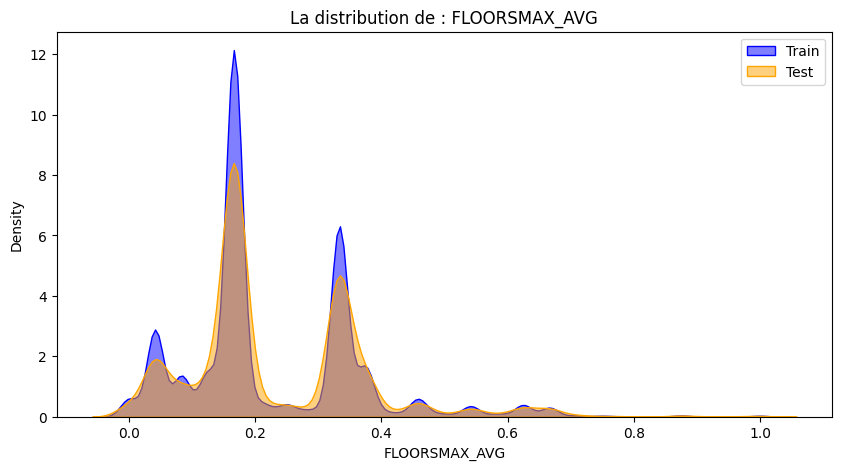

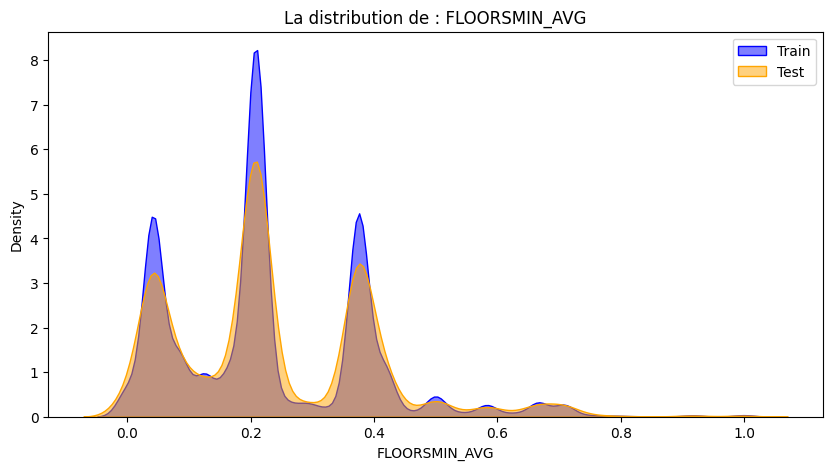

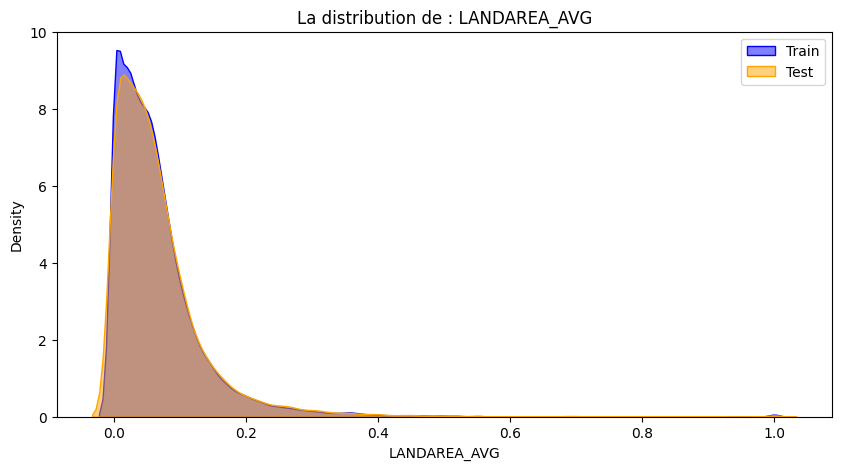

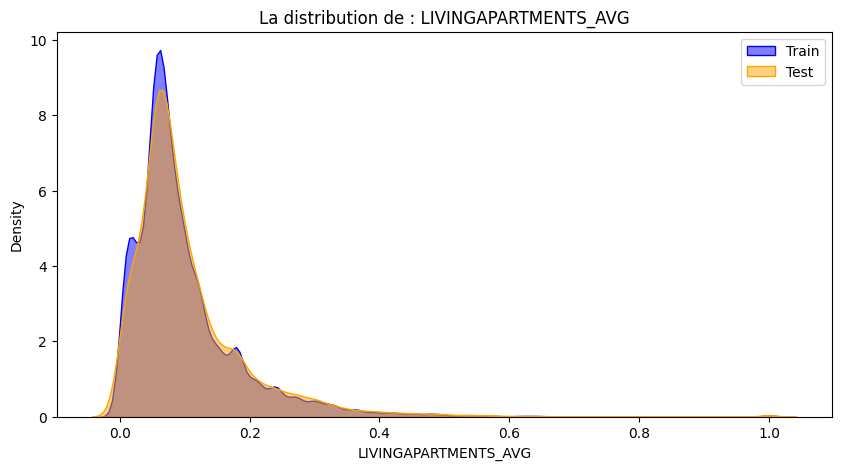

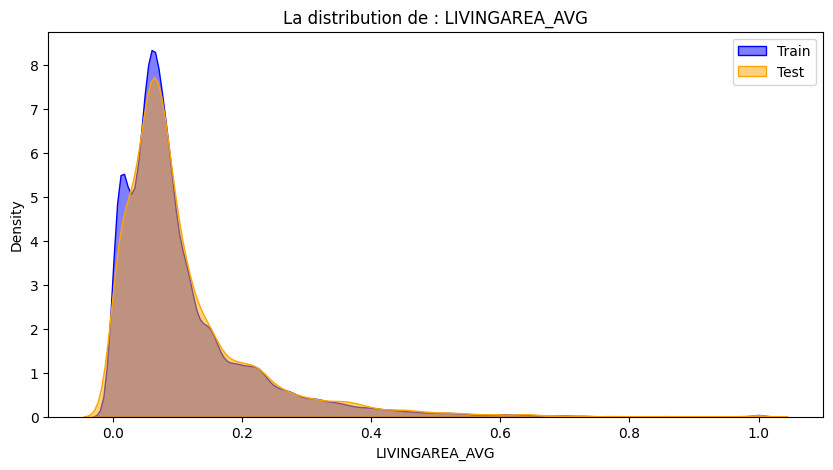

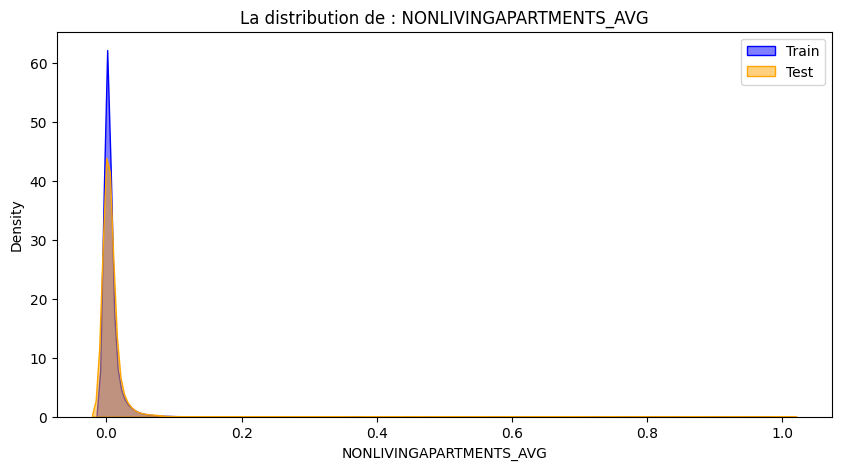

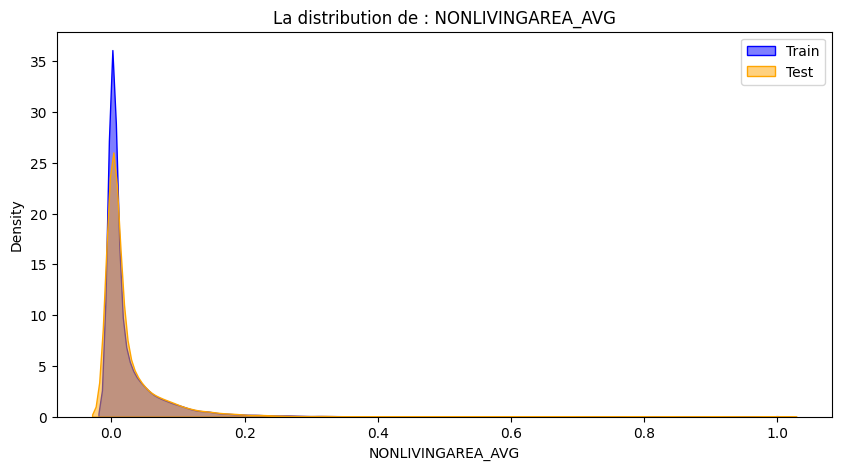

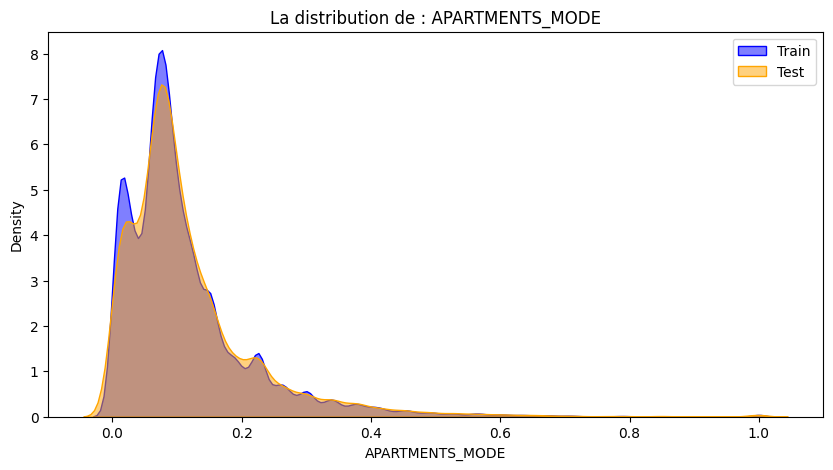

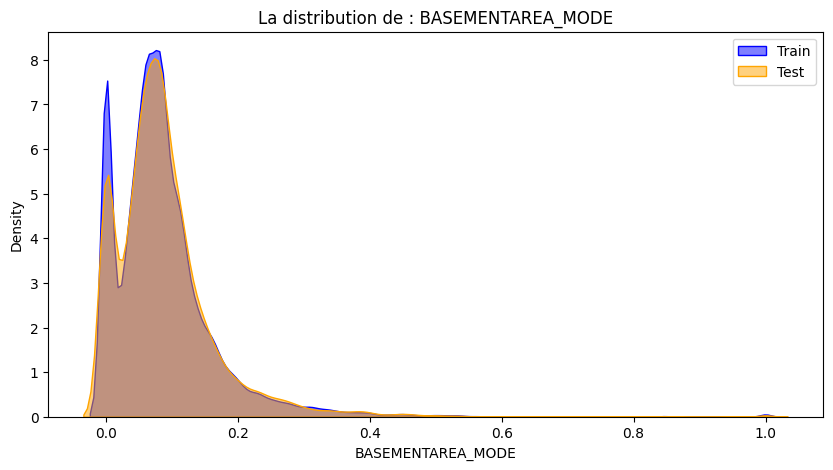

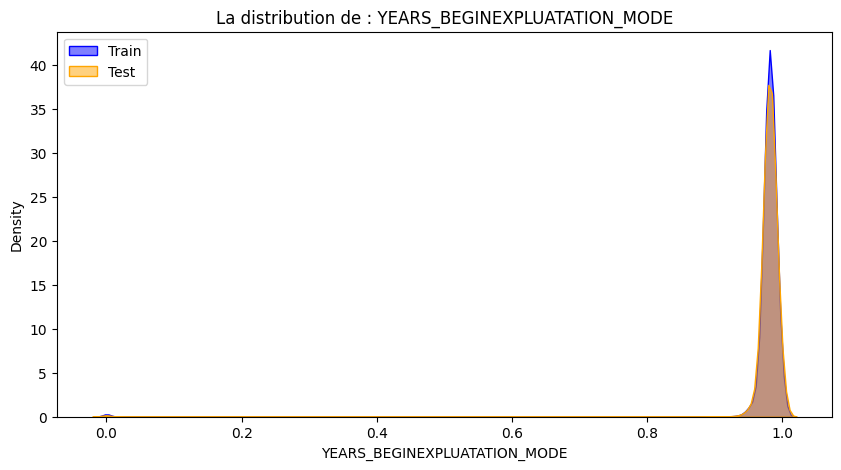

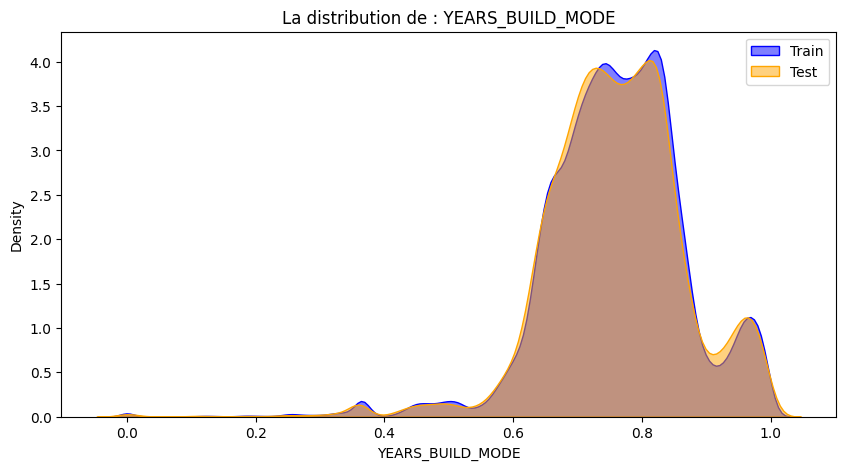

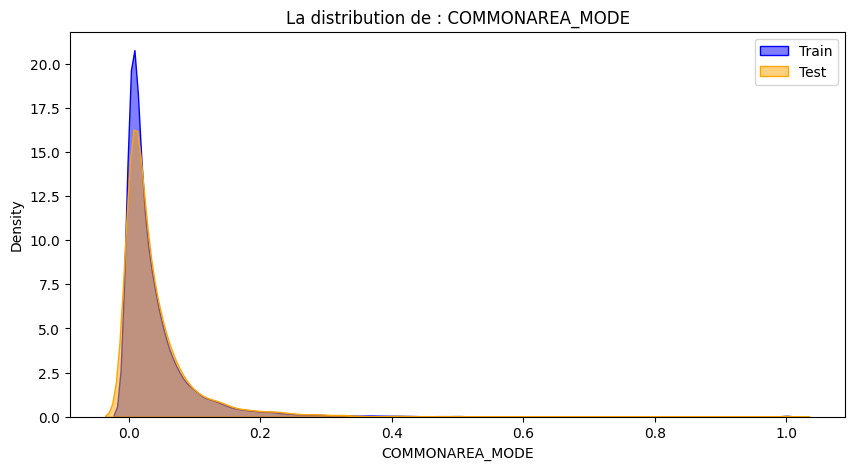

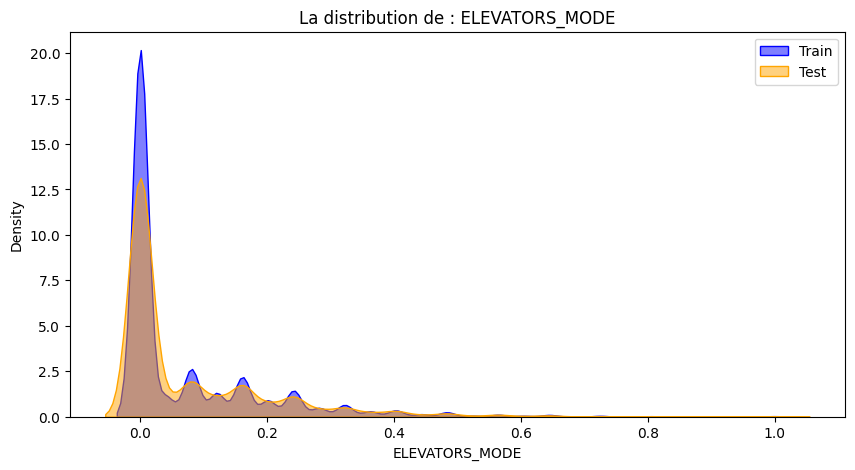

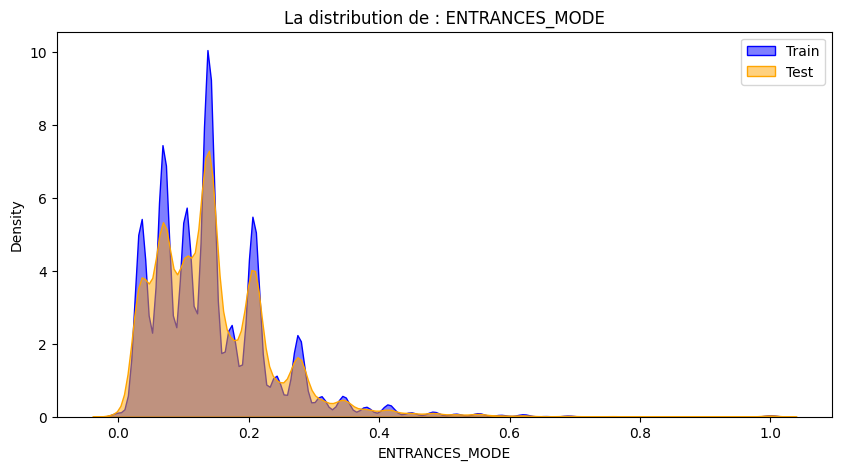

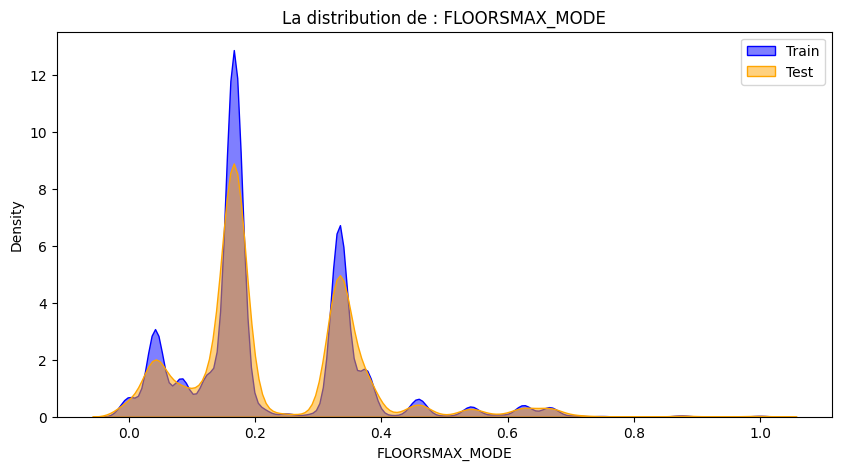

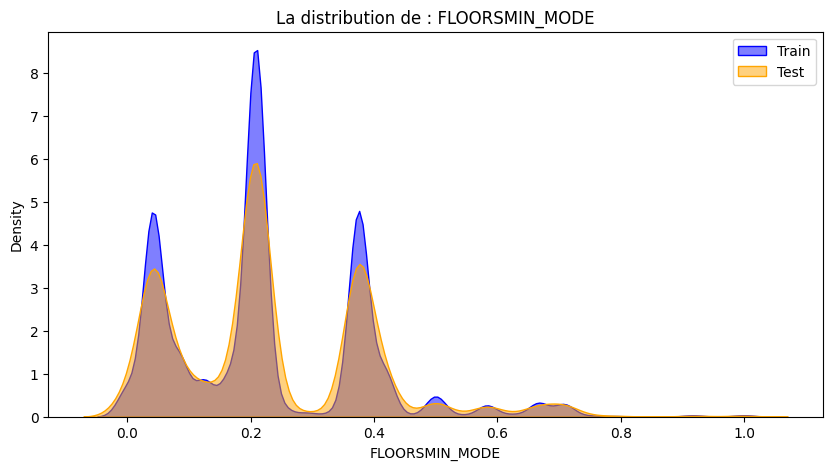

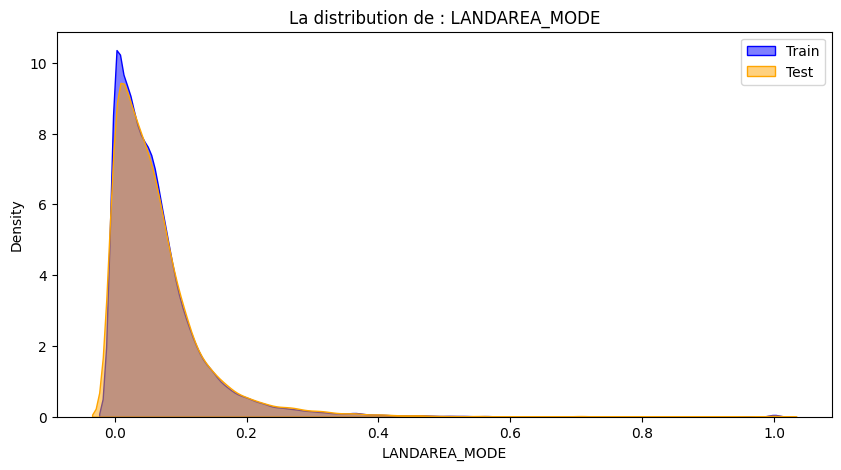

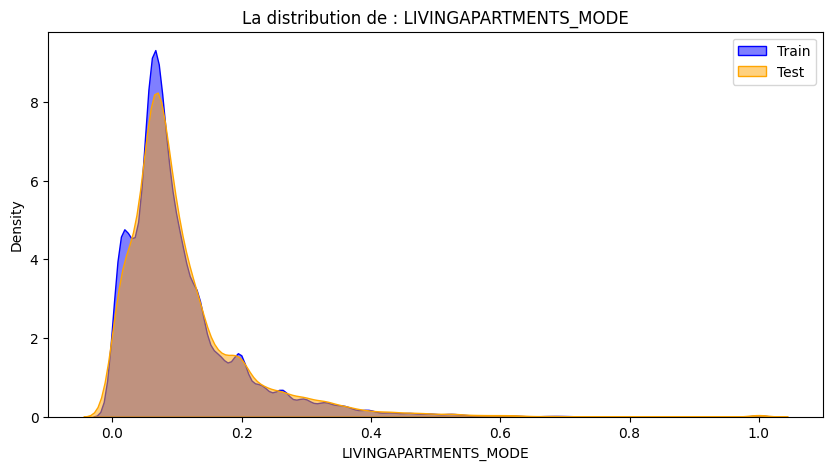

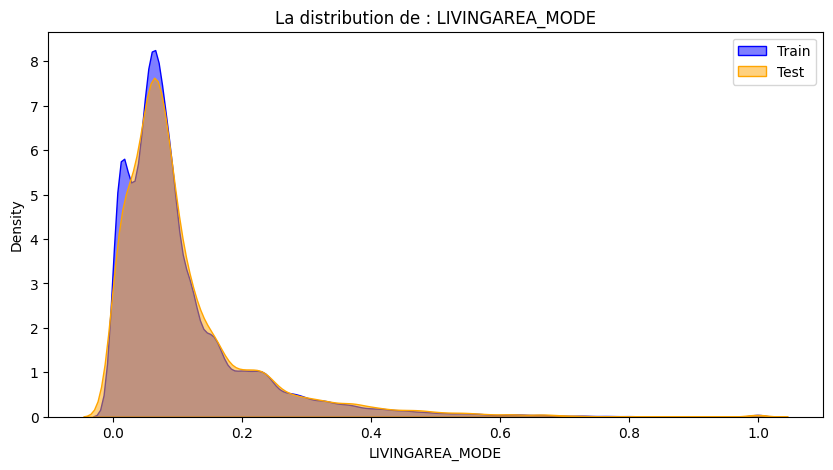

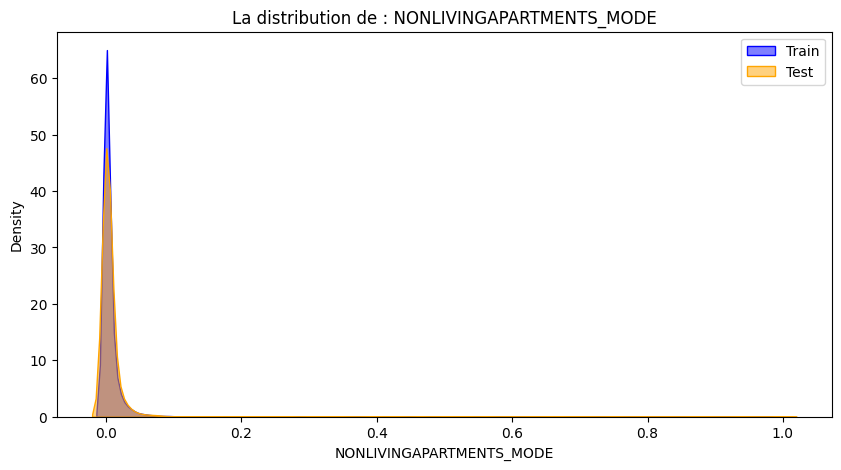

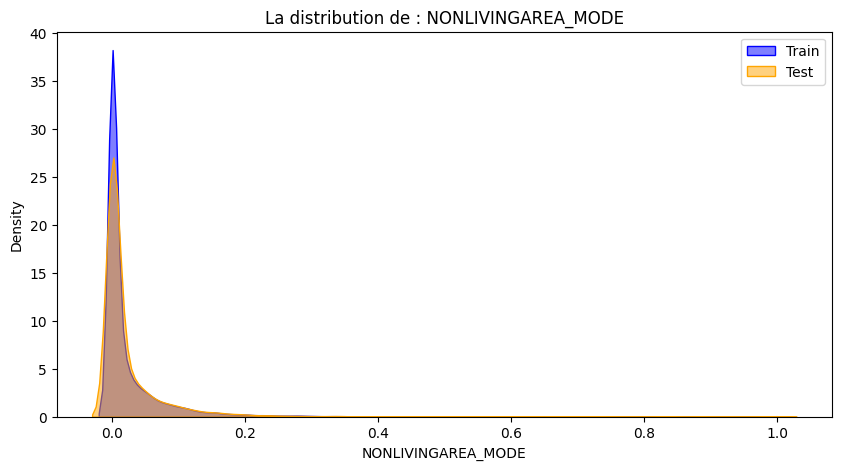

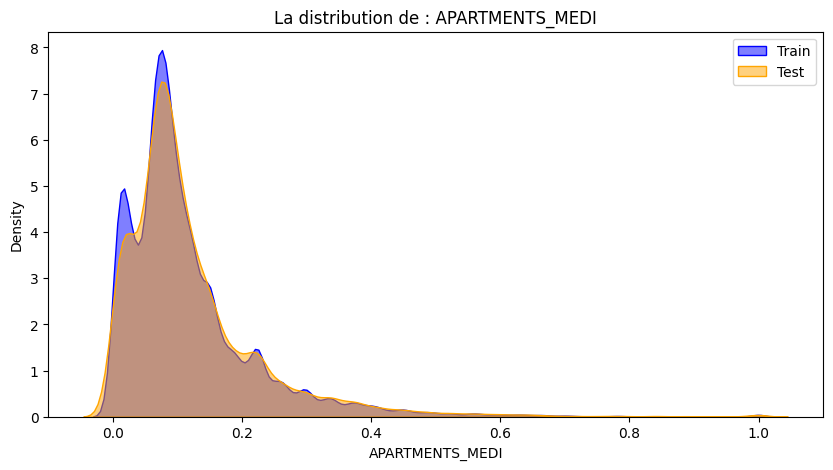

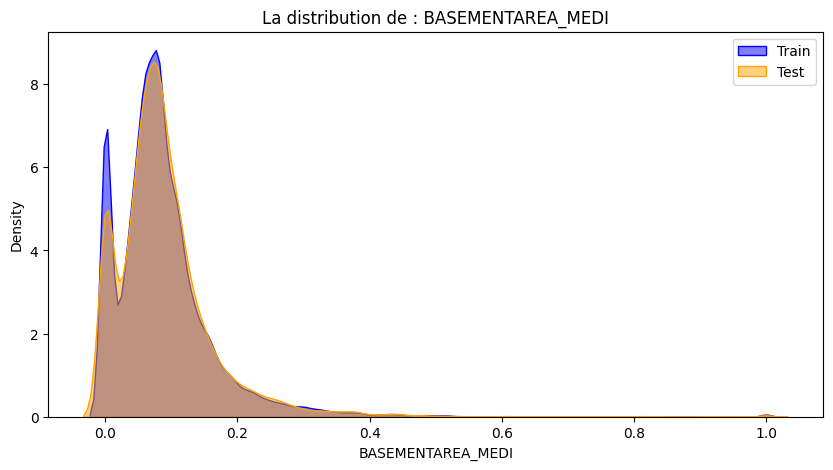

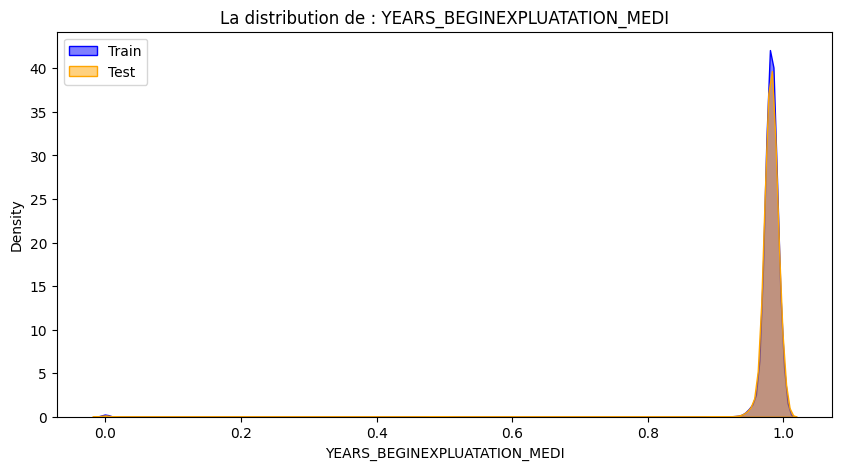

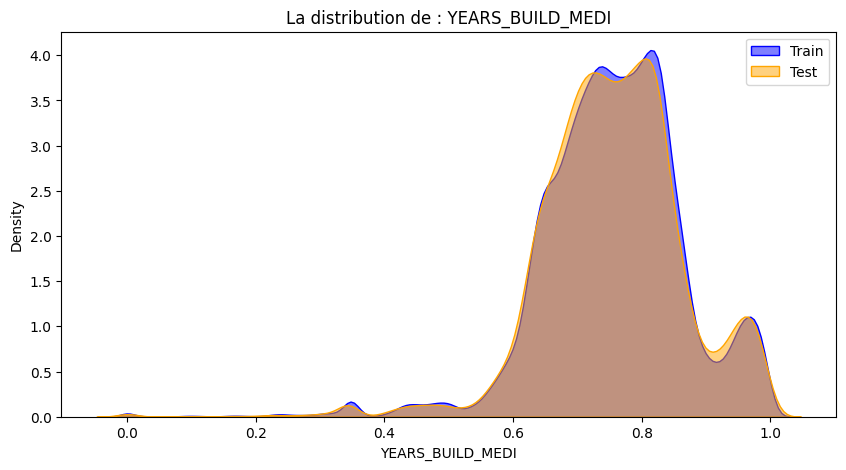

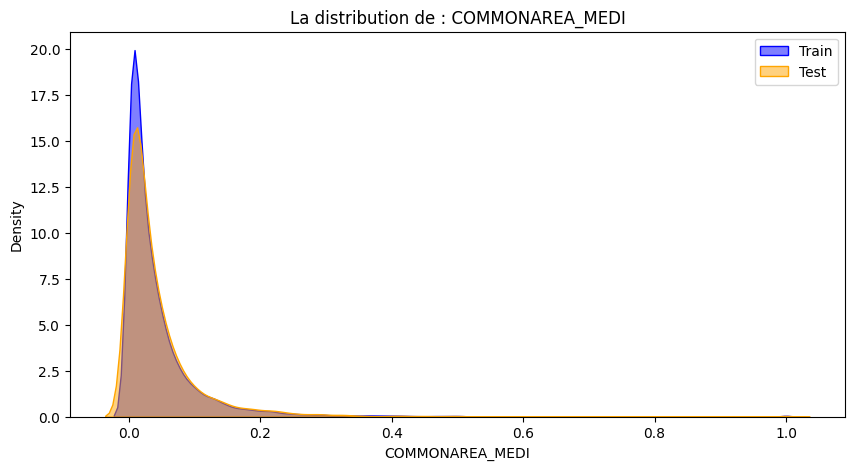

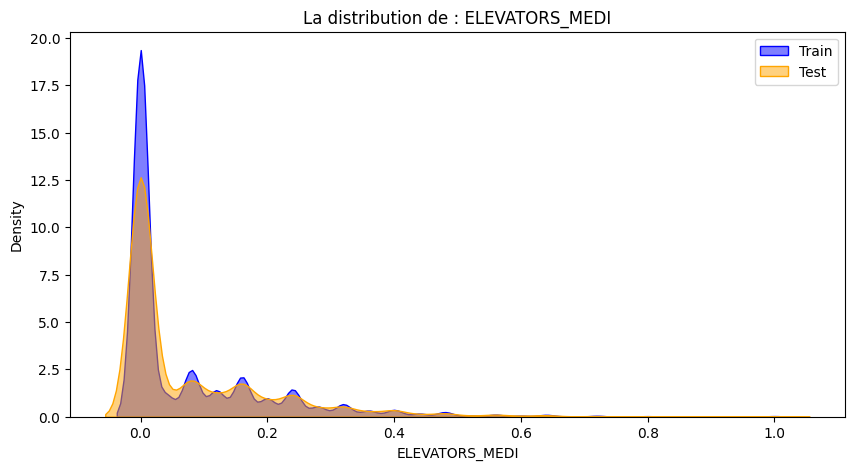

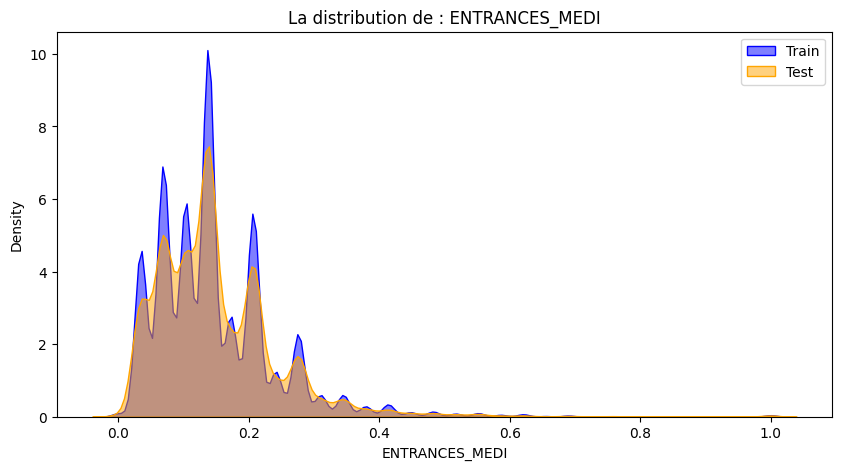

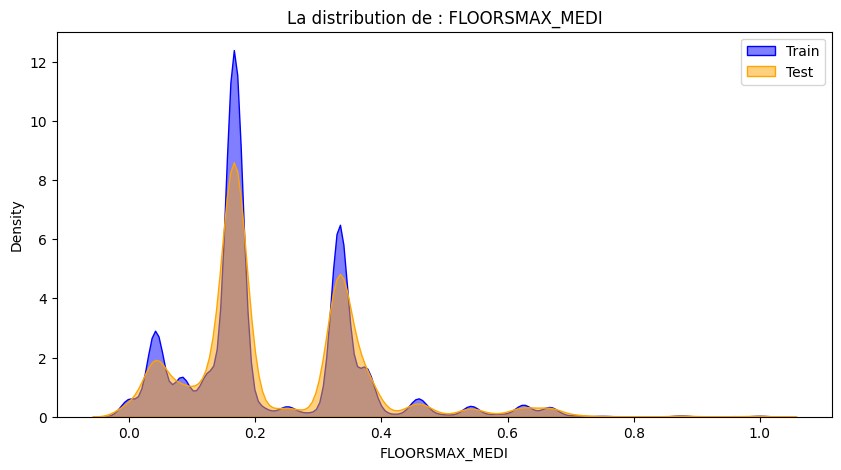

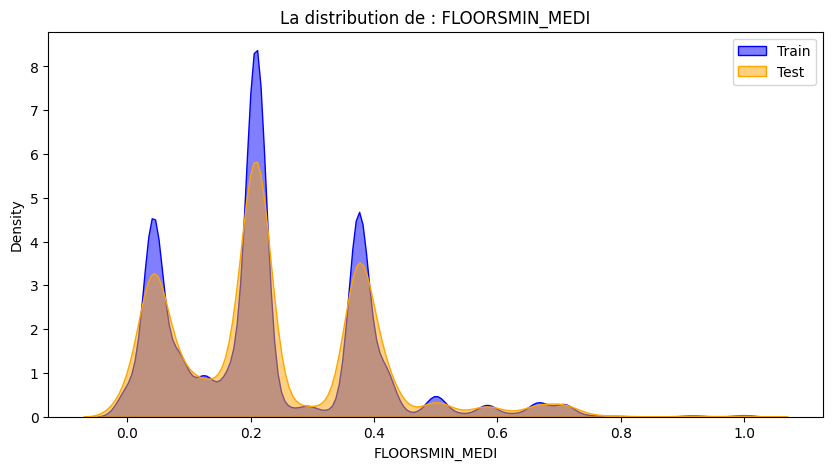

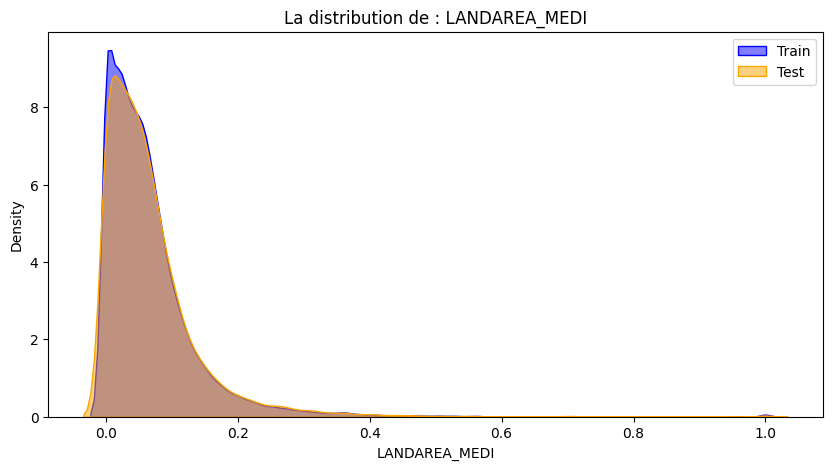

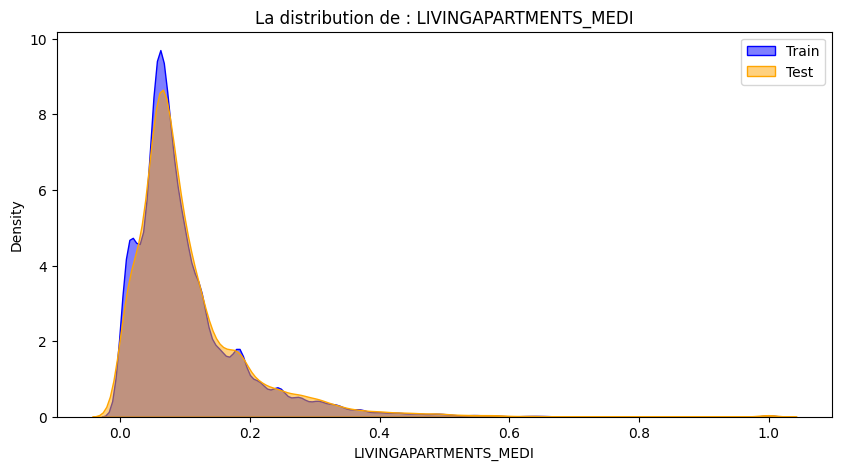

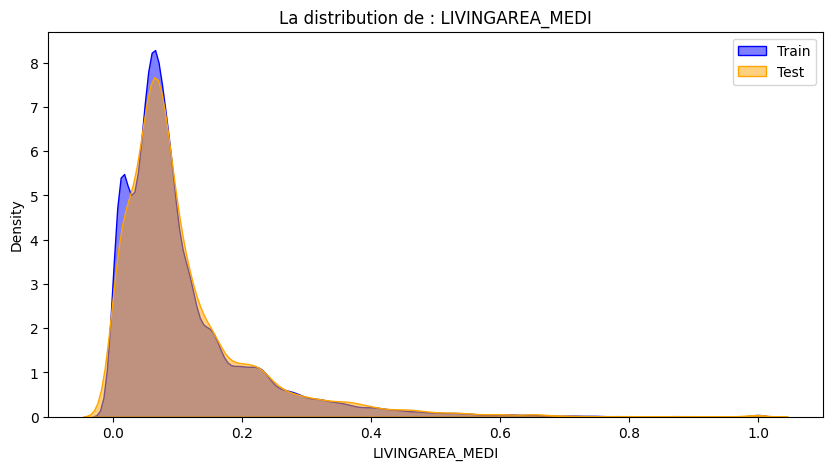

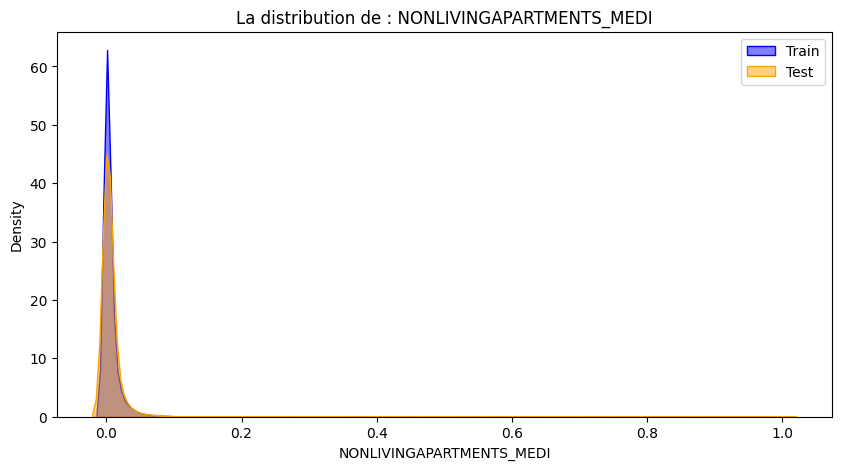

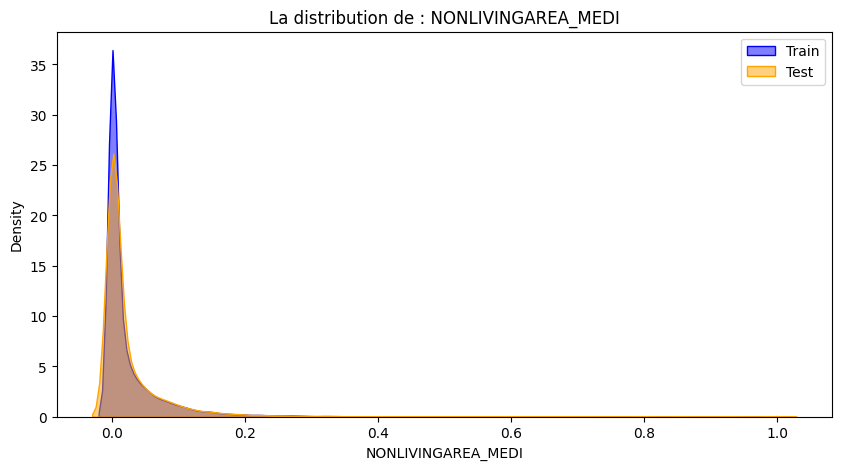

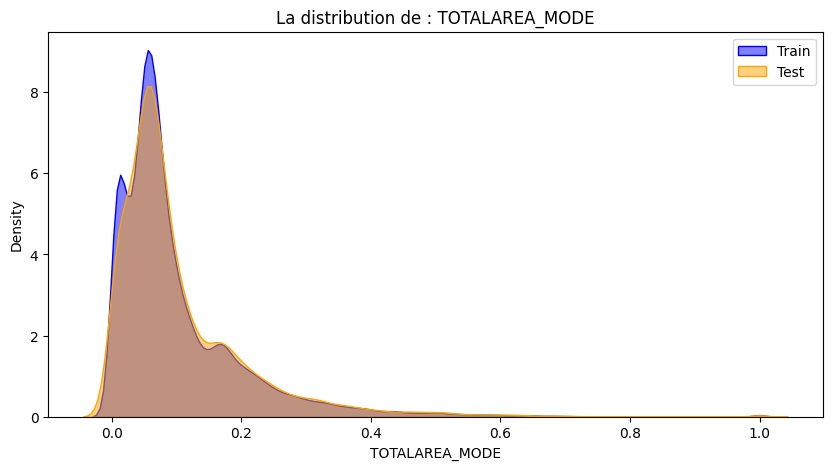

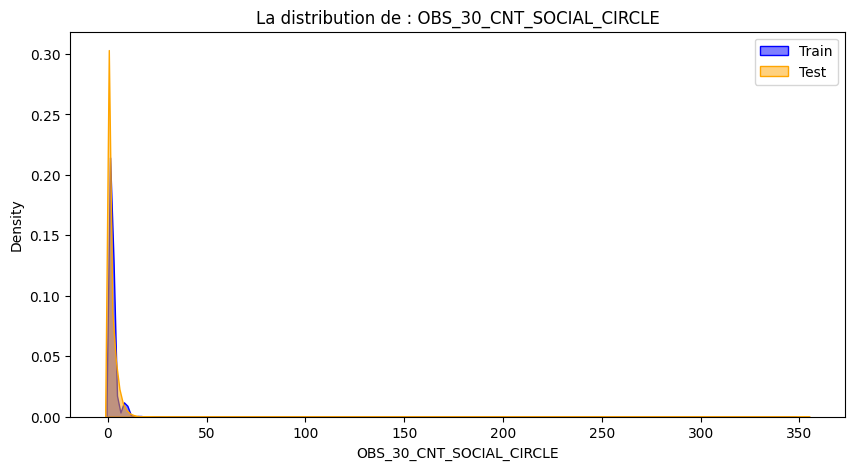

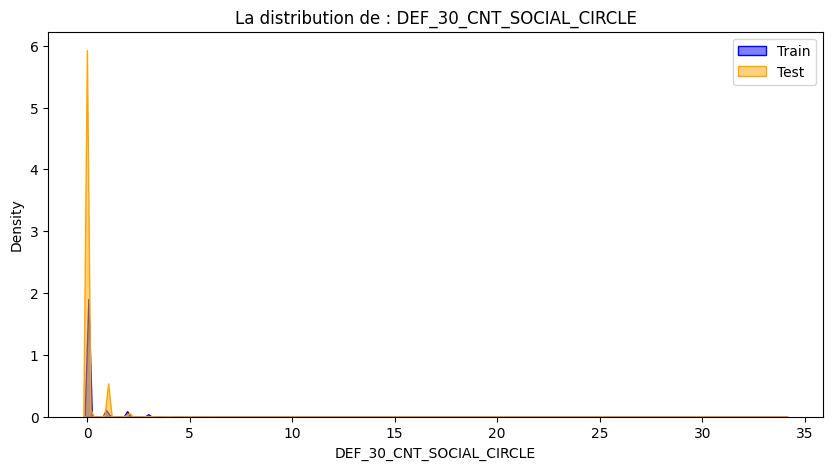

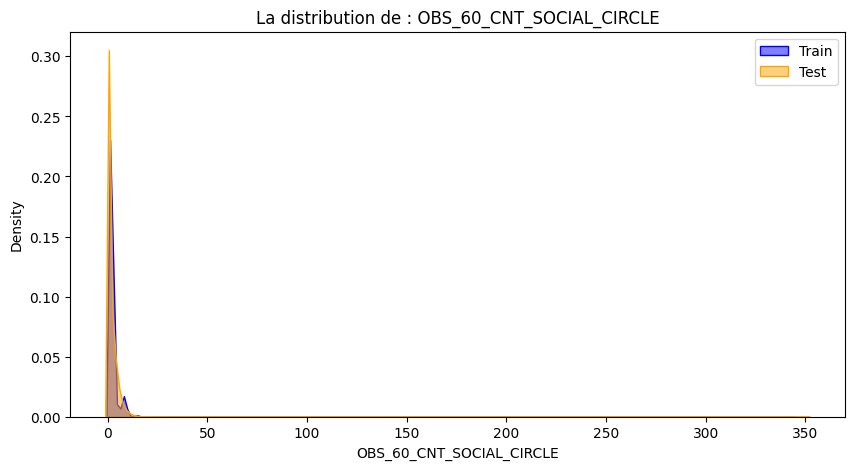

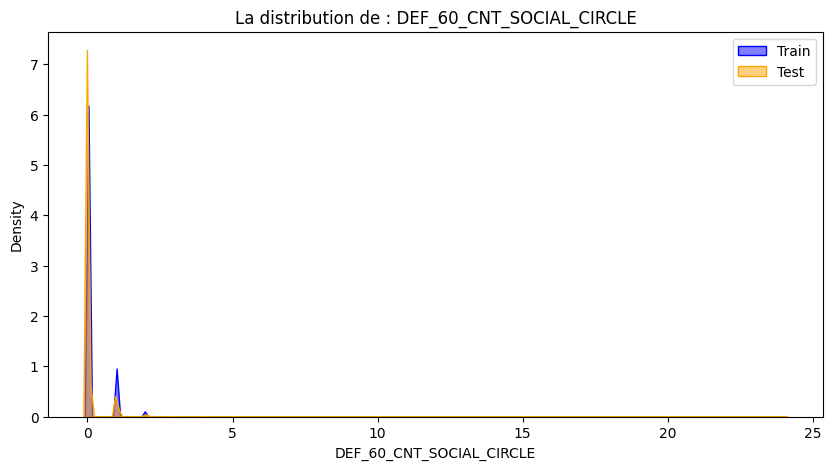

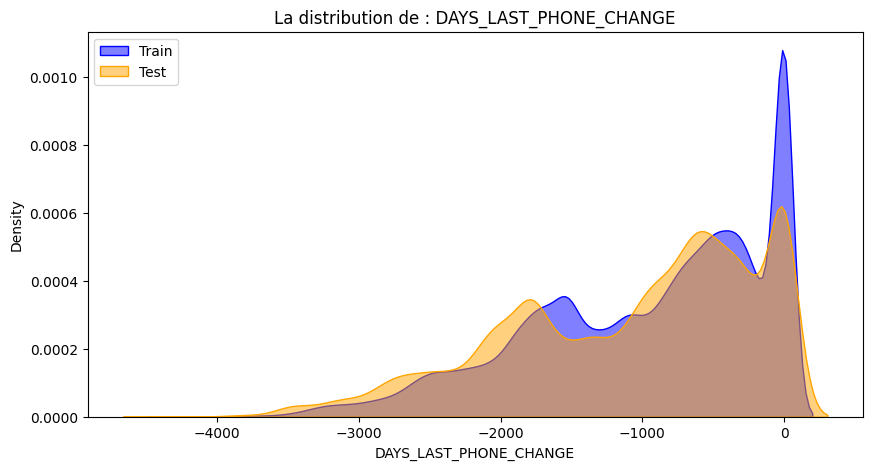

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



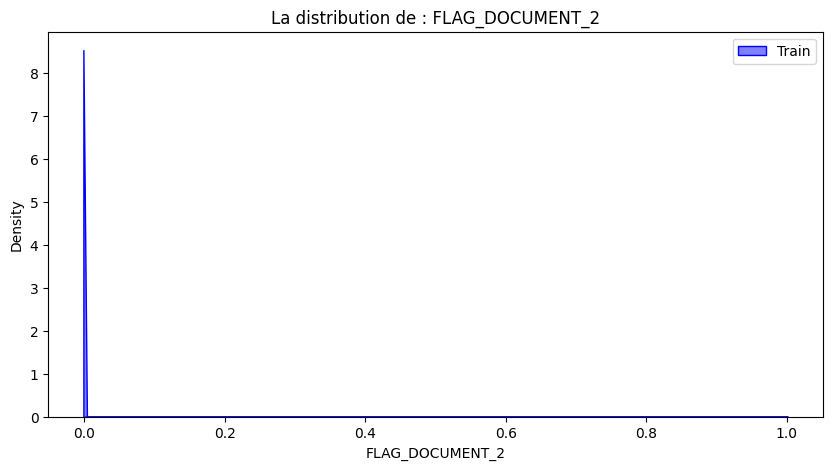

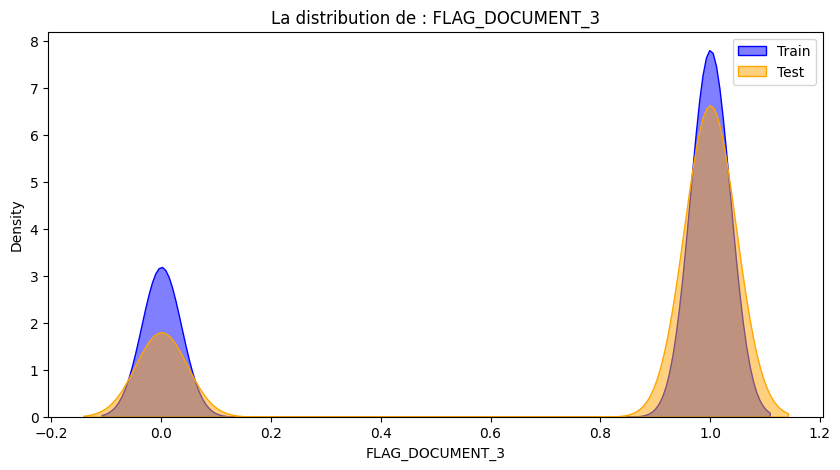

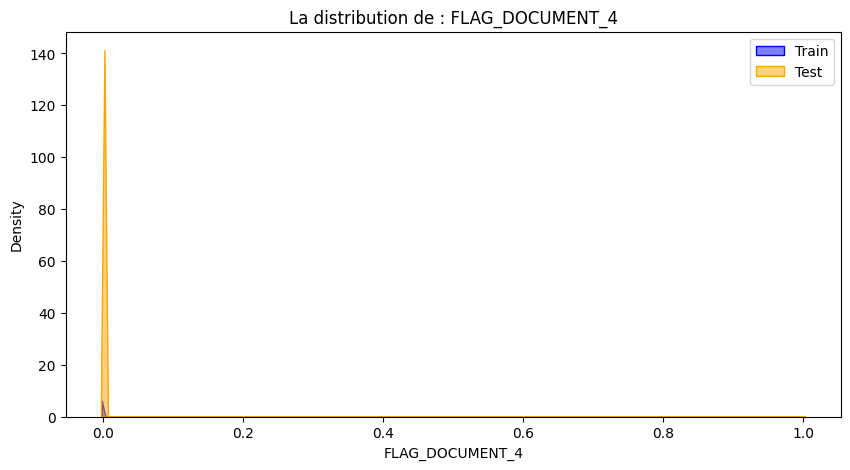

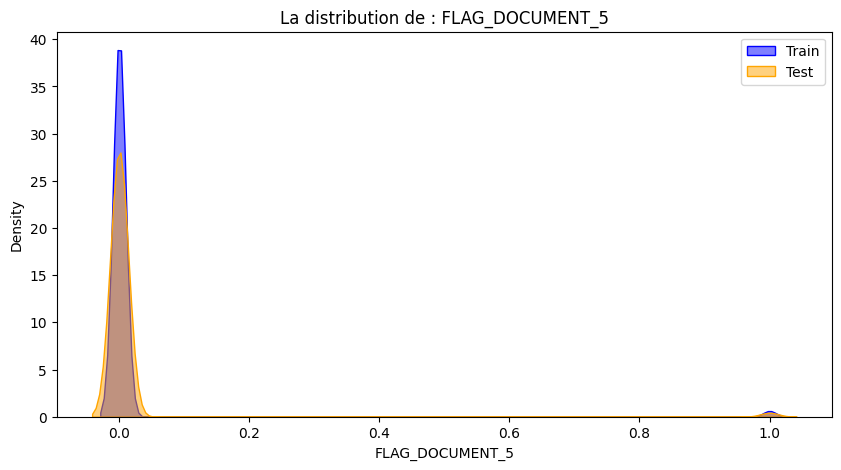

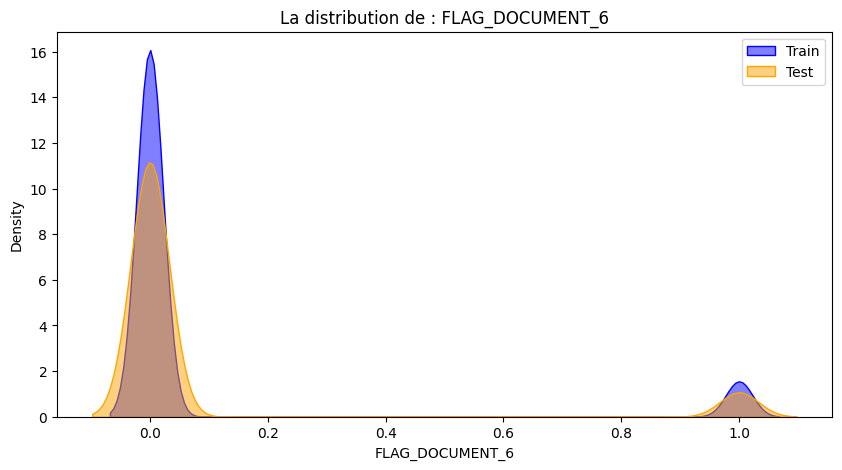

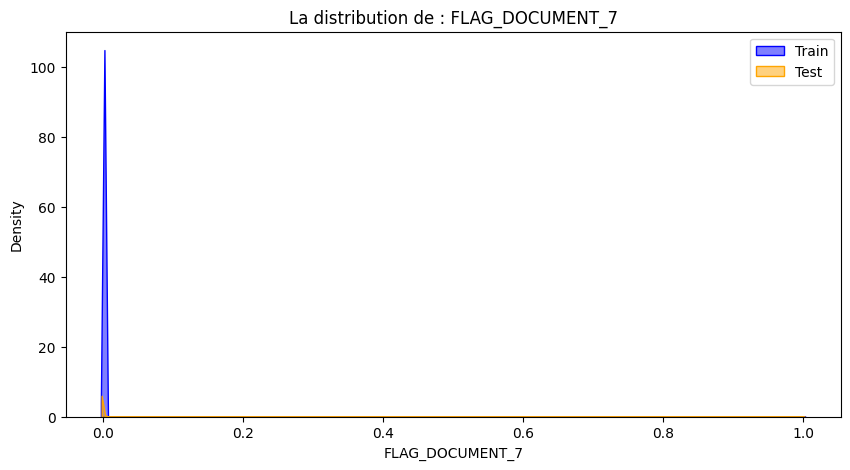

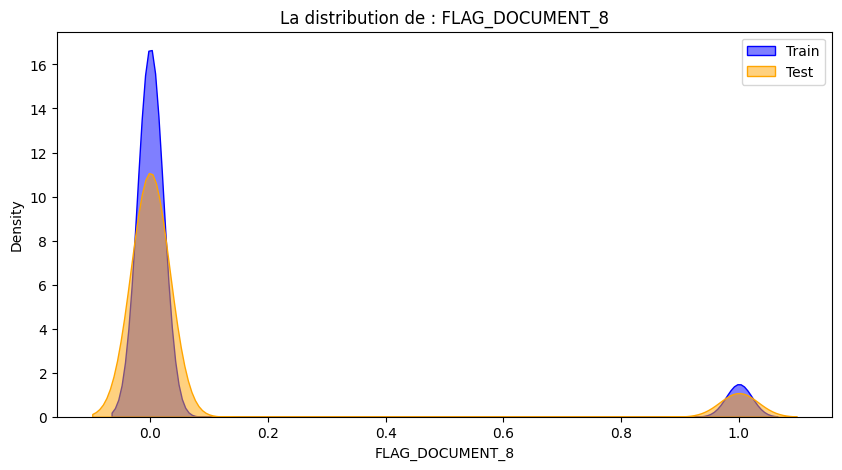

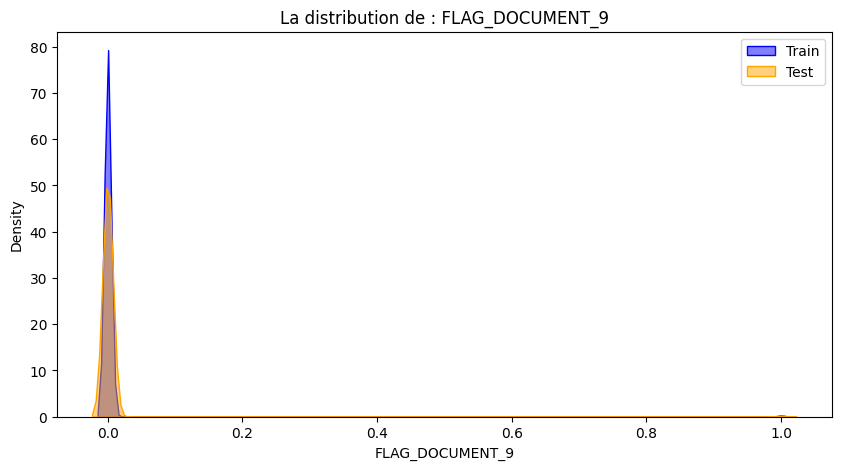

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



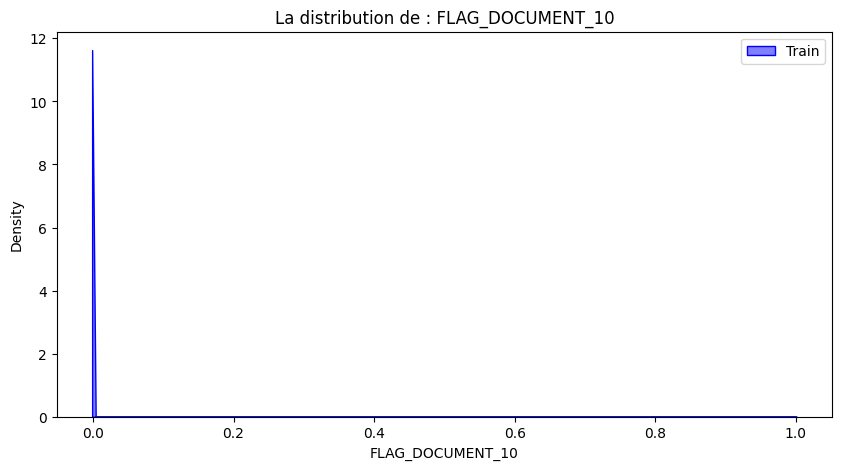

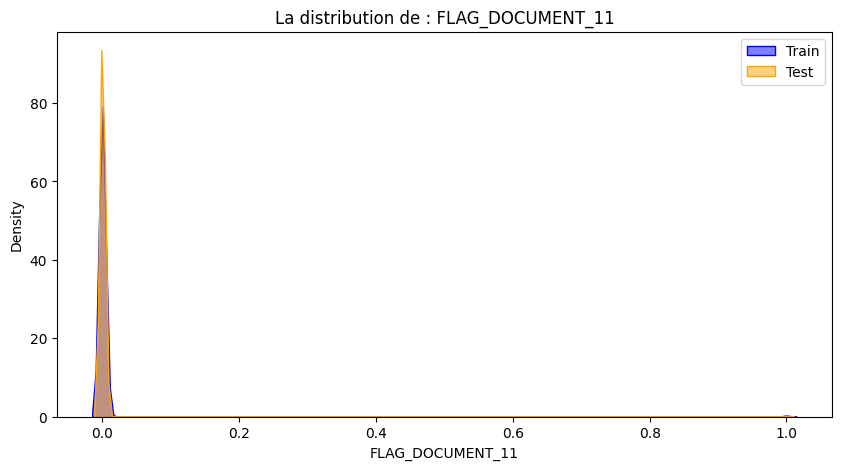

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



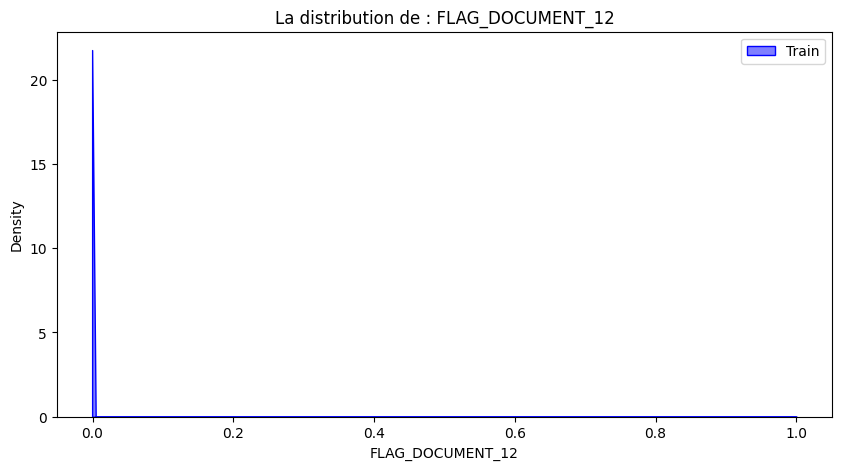

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



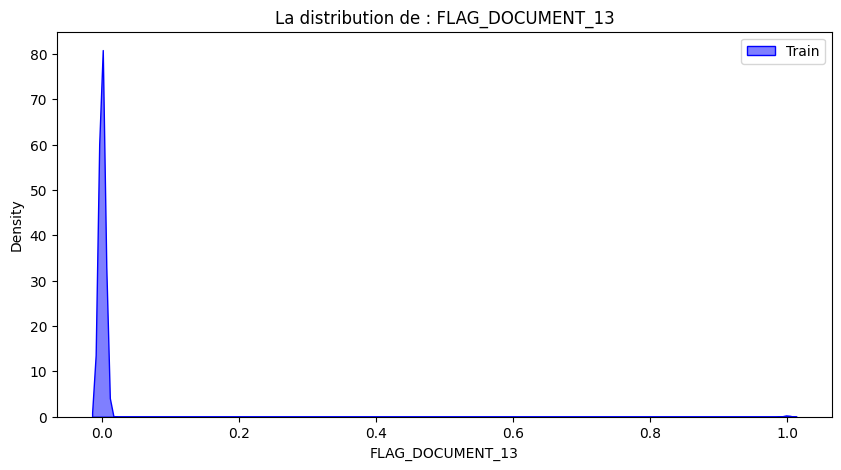

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



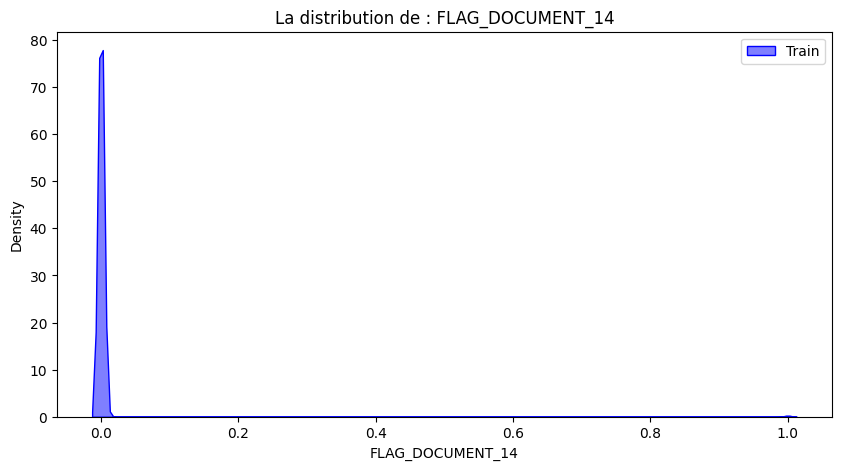

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



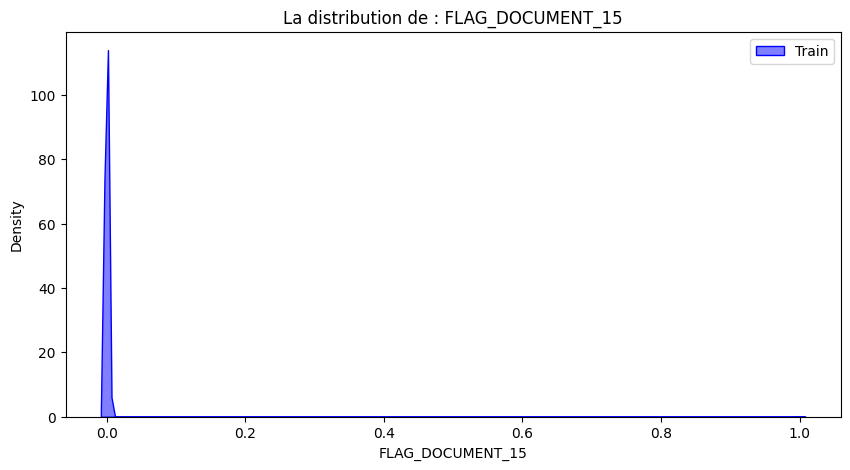

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



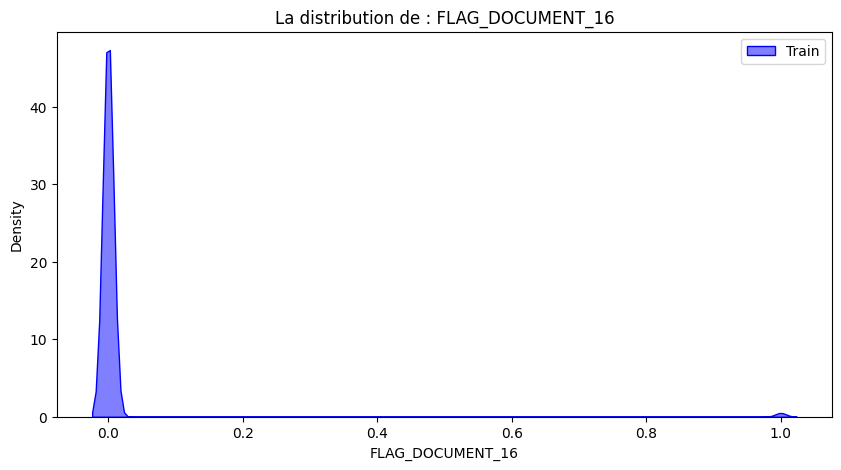

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



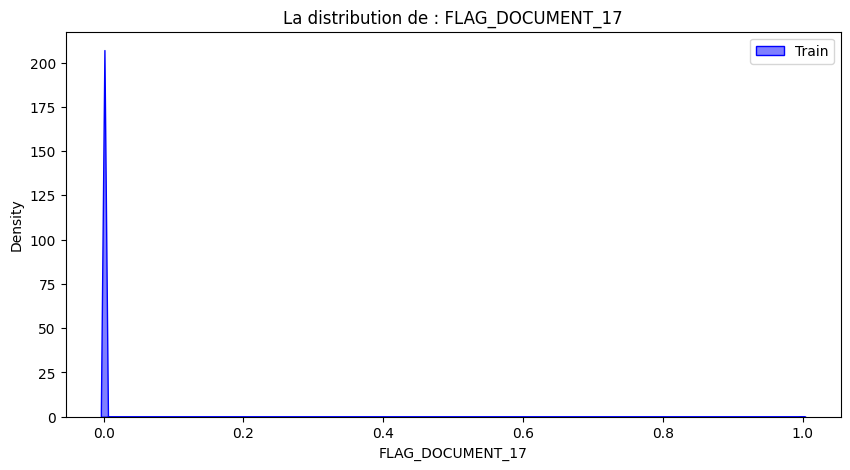

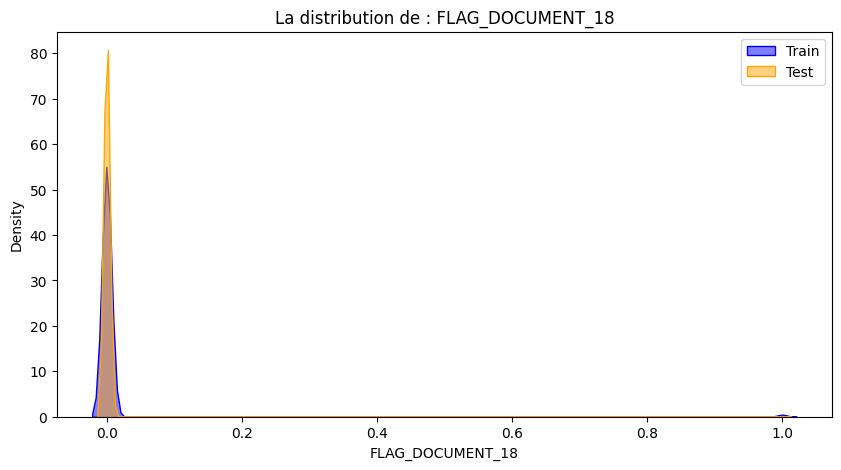

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



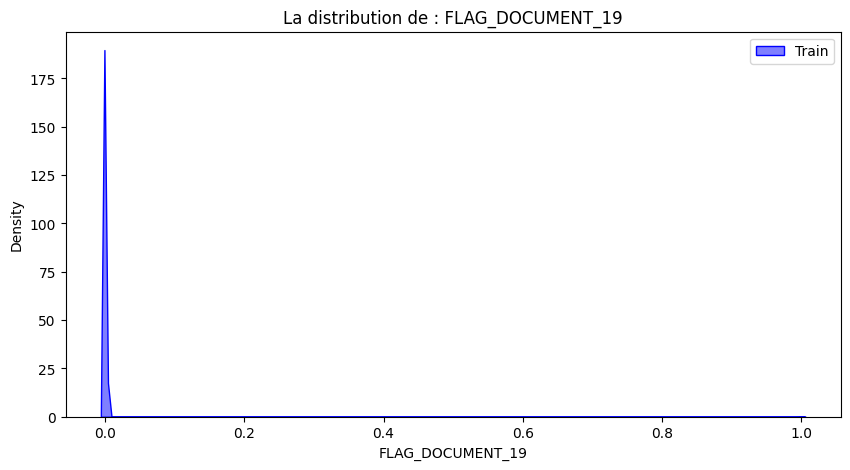

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



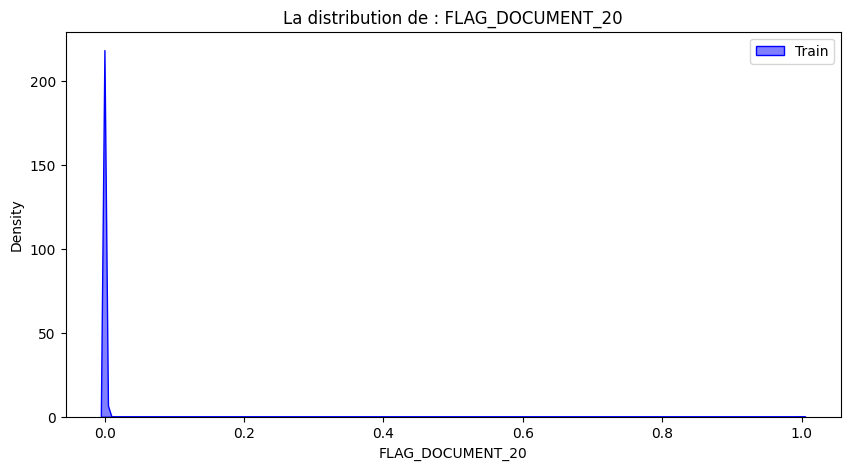

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1653473417.py:62: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



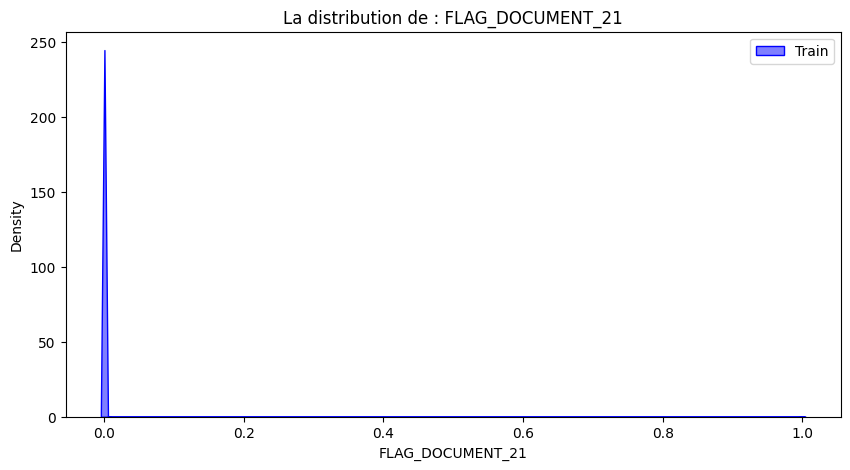

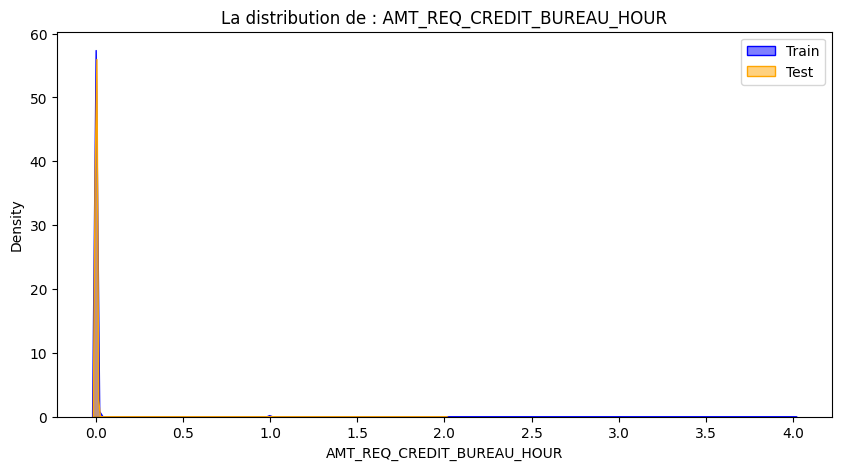

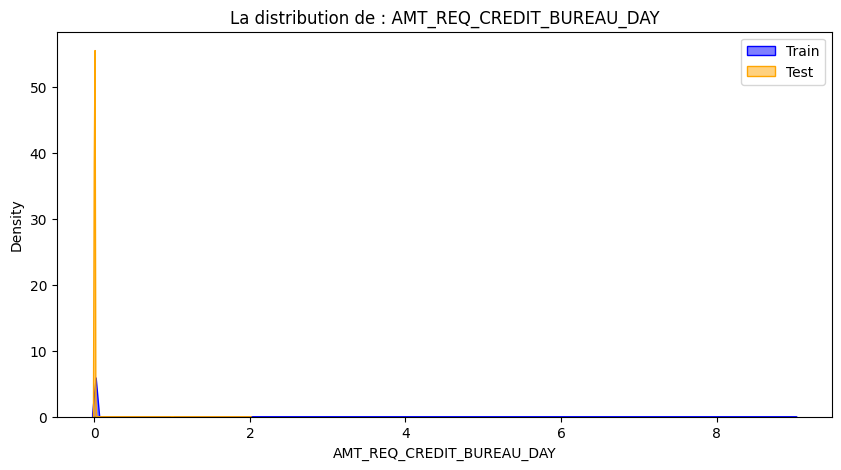

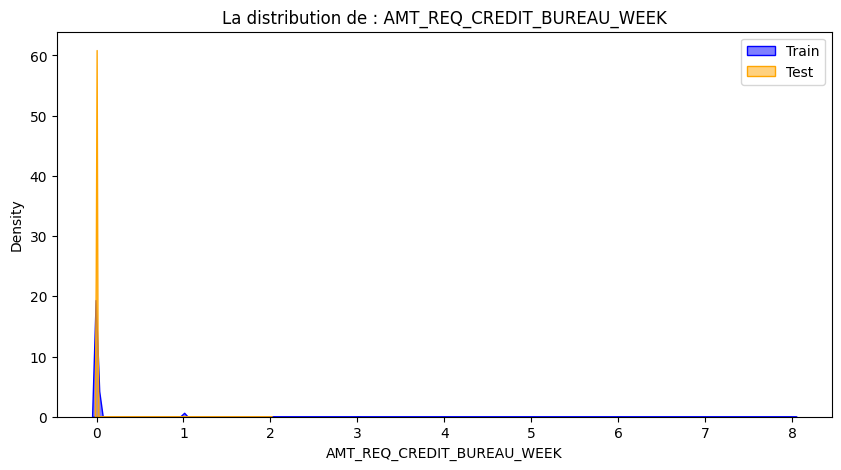

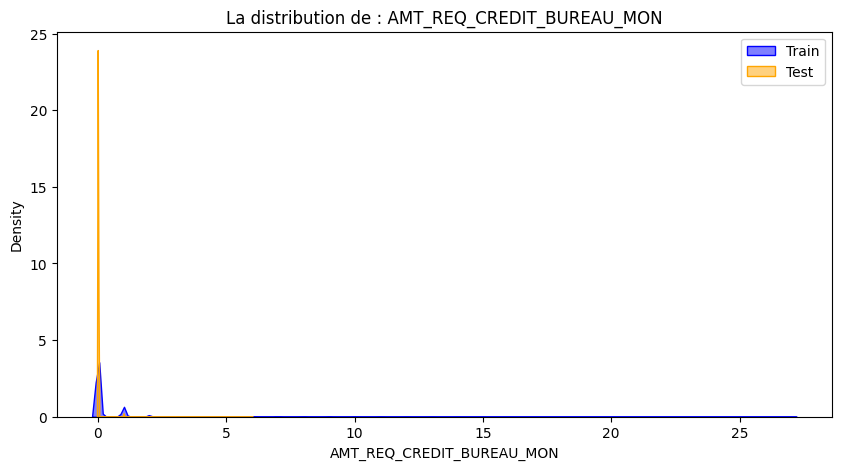

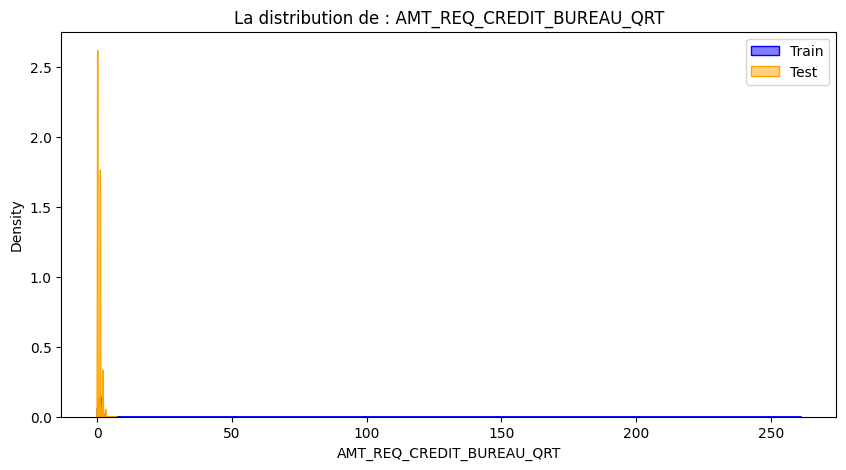

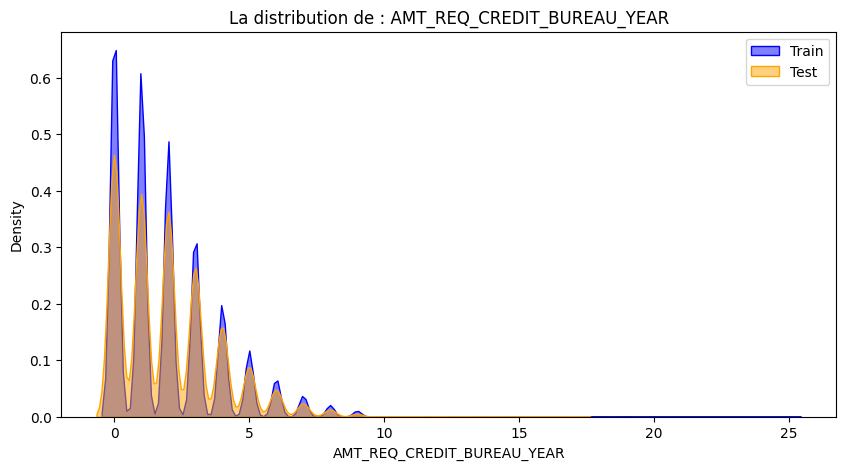

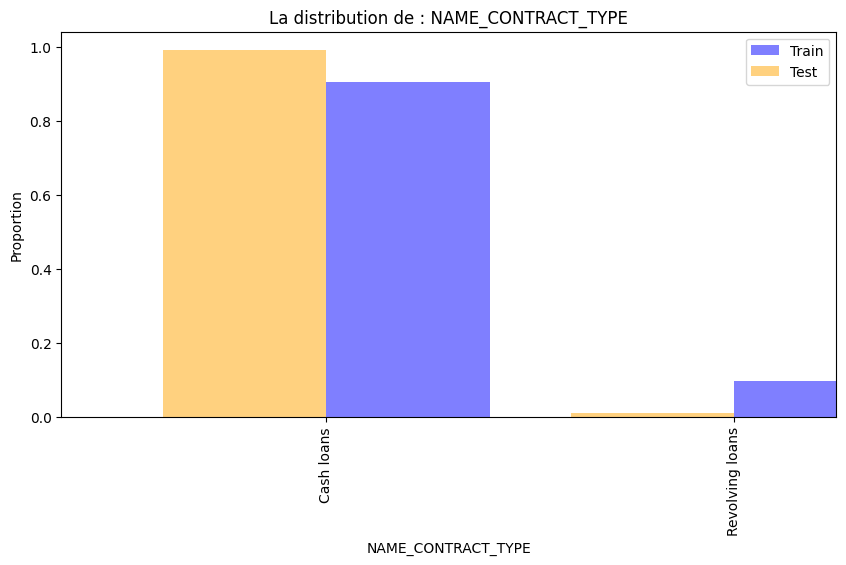

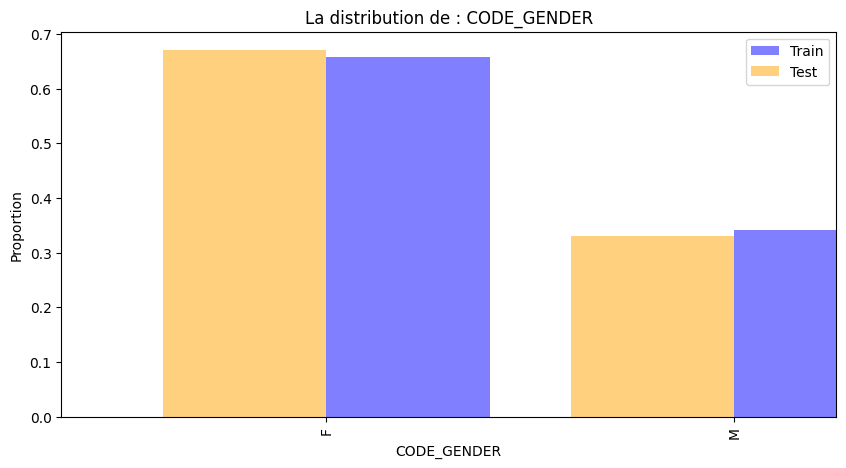

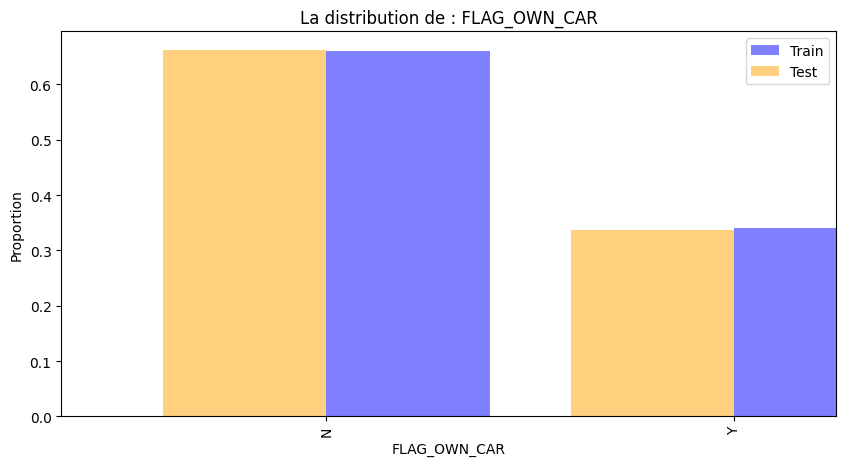

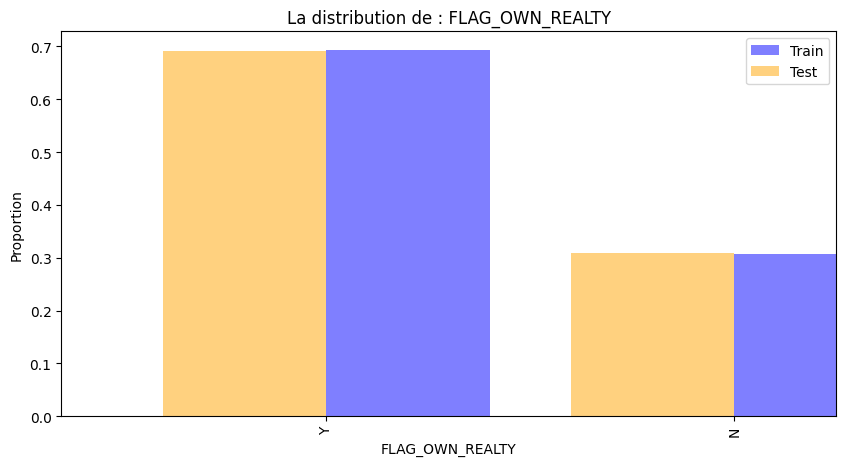

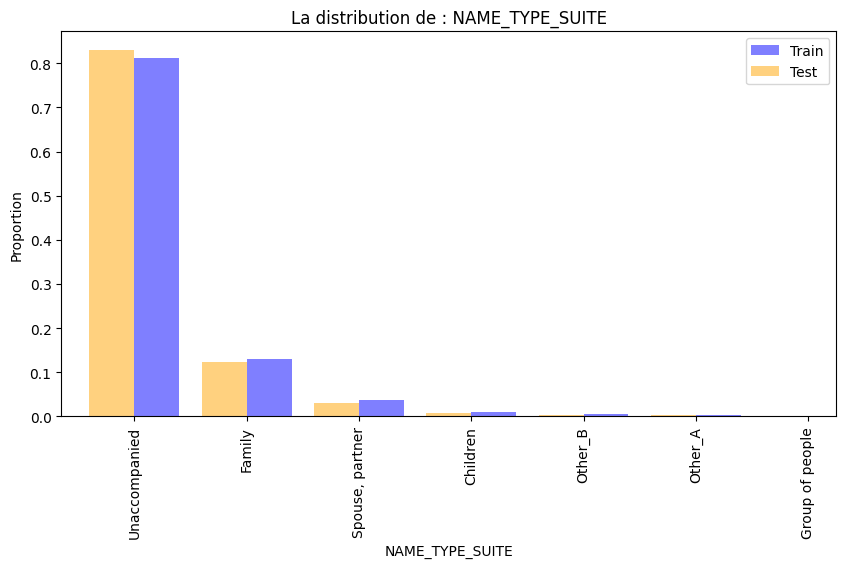

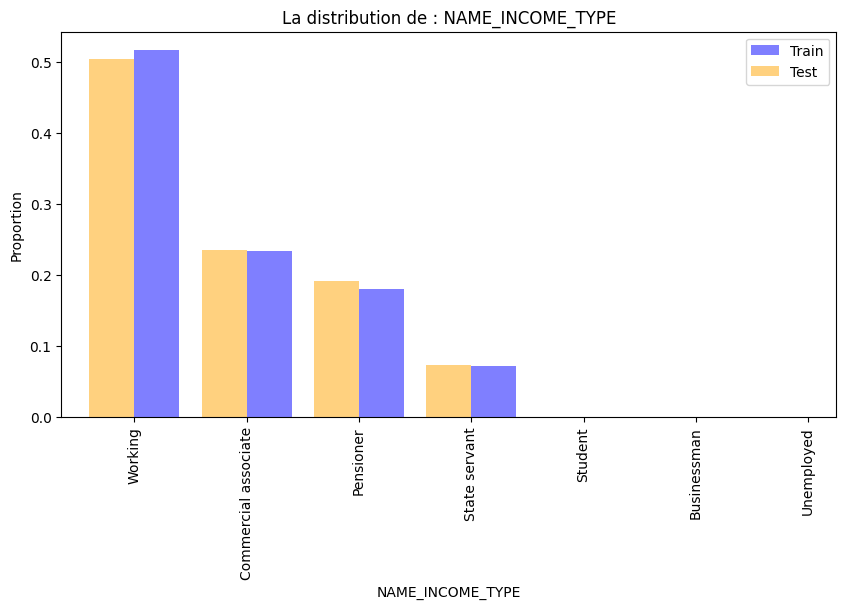

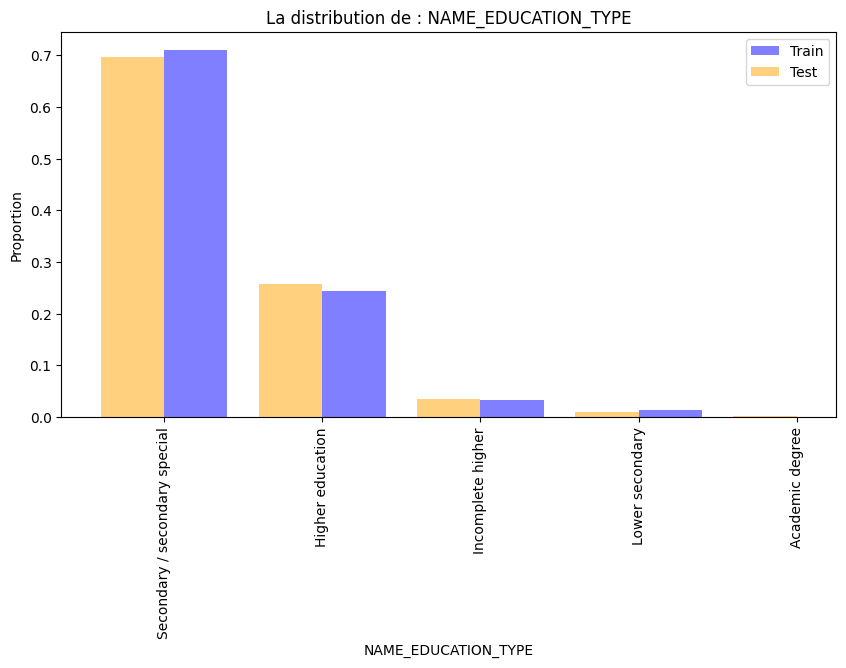

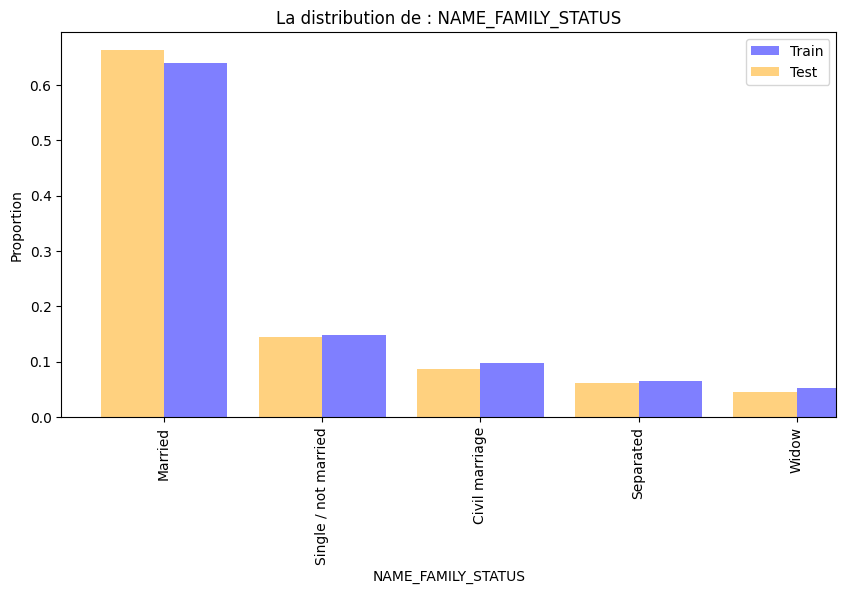

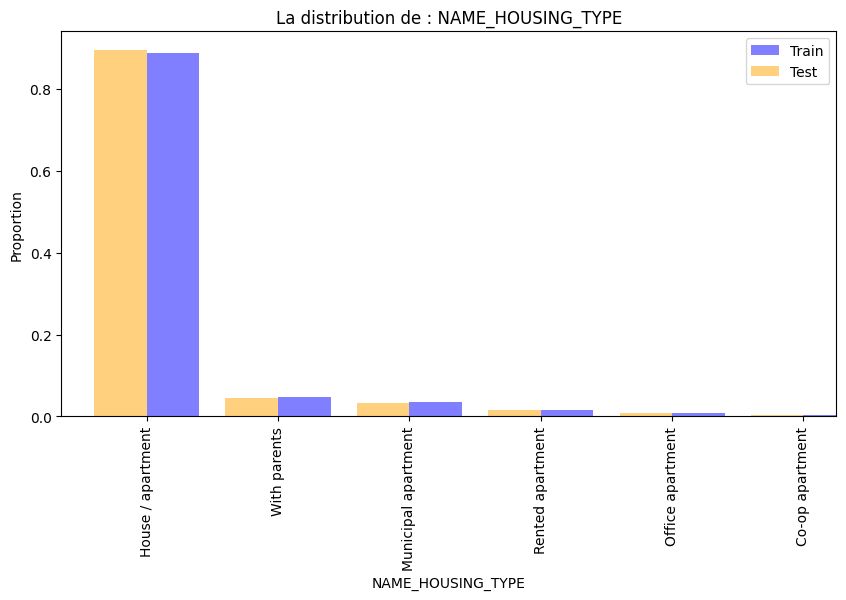

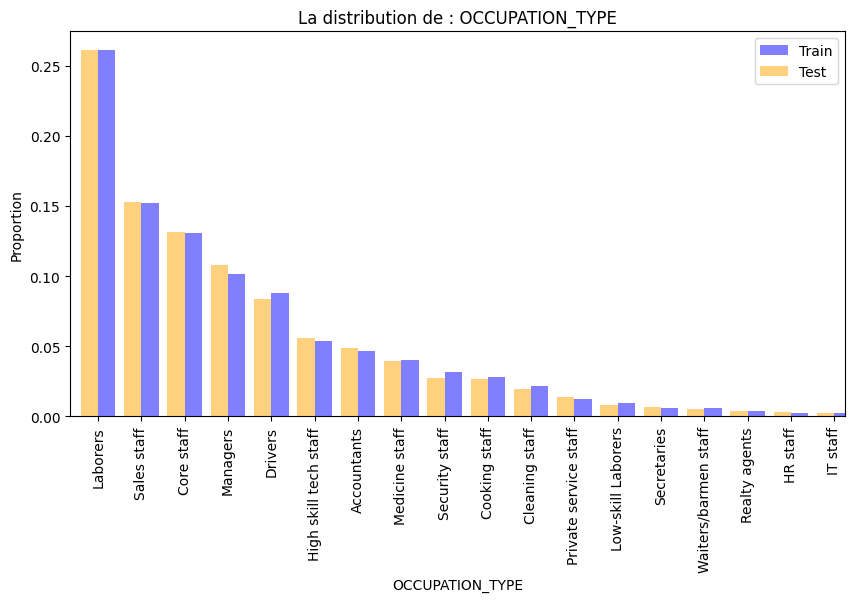

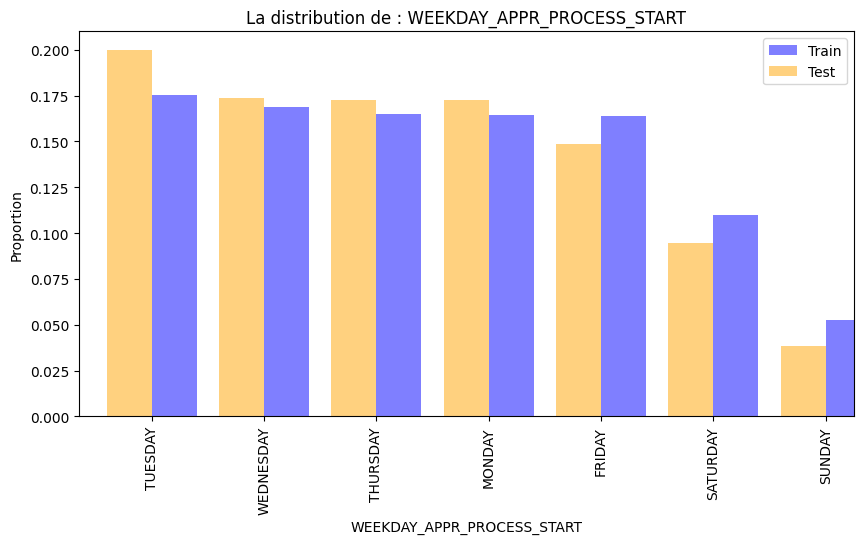

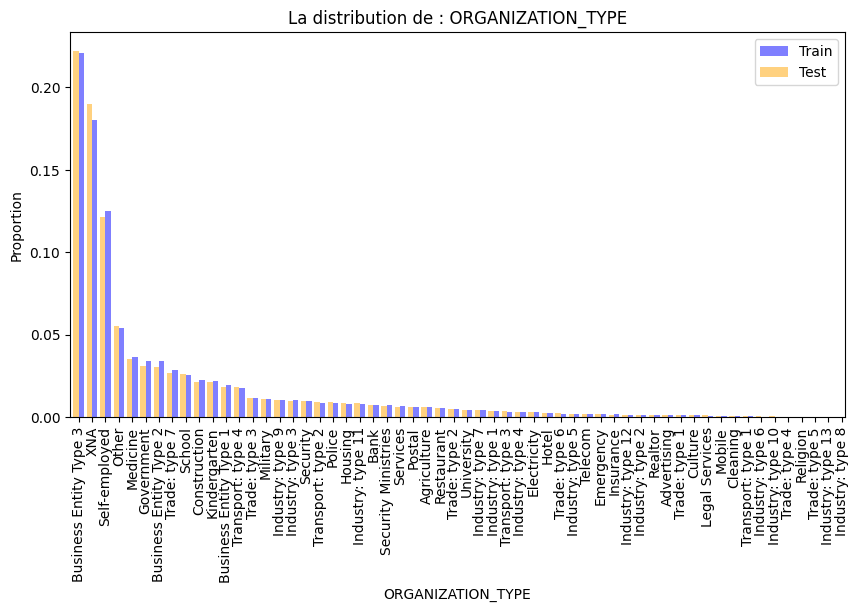

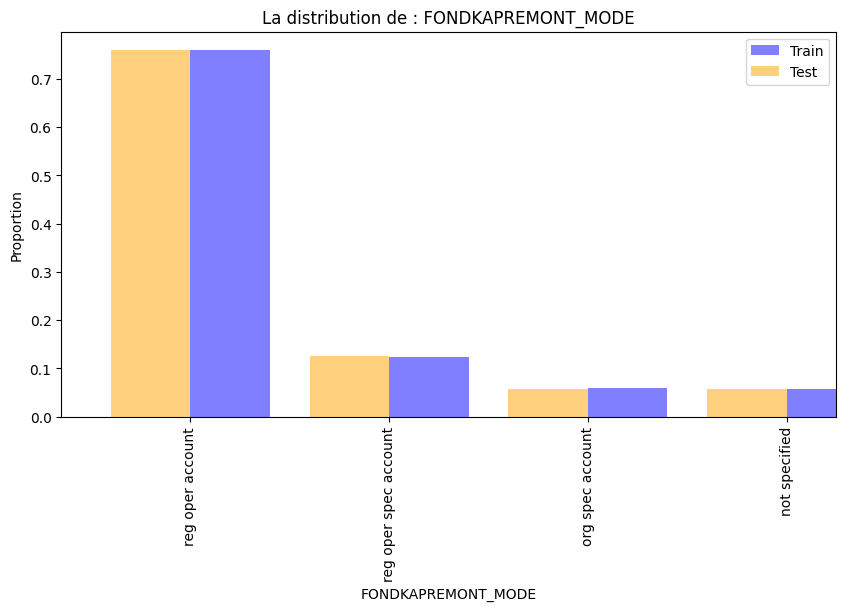

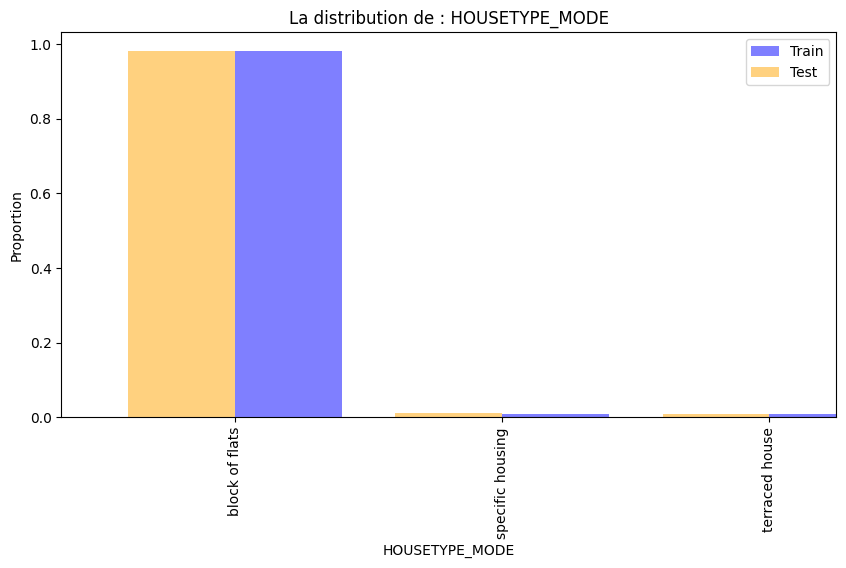

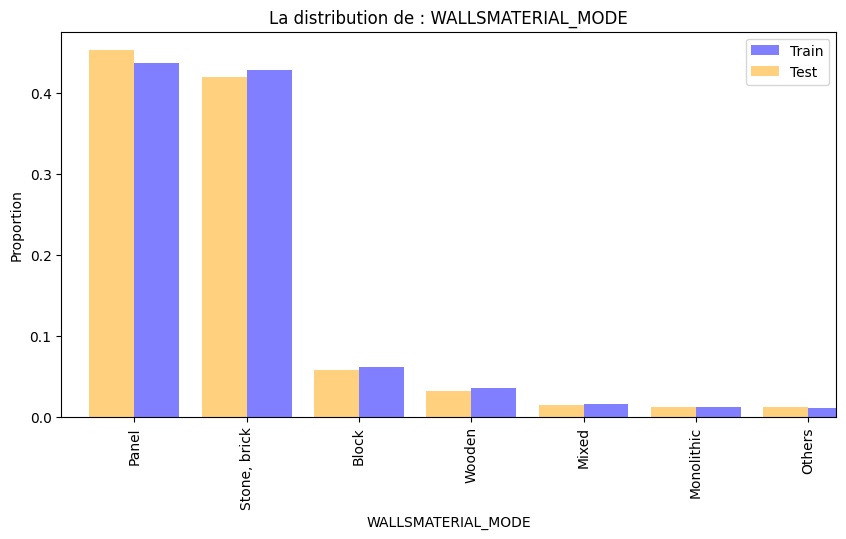

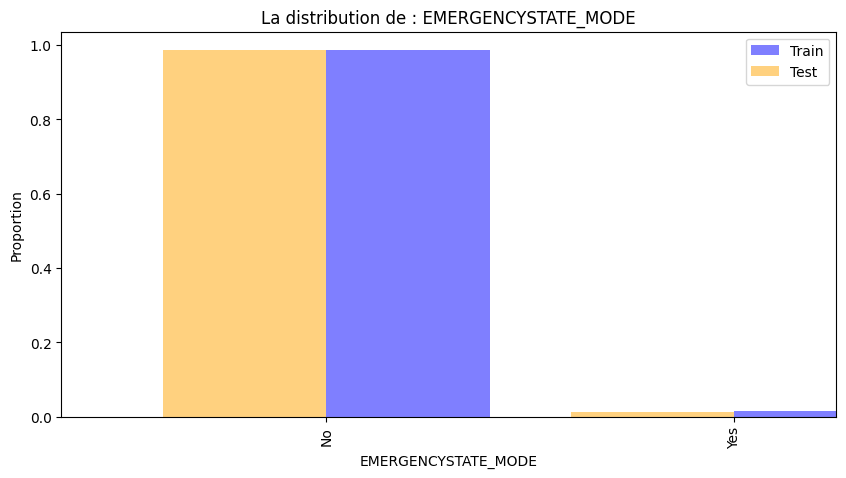

In [22]:
import pandas as pd
import numpy as np
import time
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics import DataDriftTable
import seaborn as sns
import matplotlib.pyplot as plt

#les données
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

#suppression des lignes avec NaN dans "TARGET" et les cols inutiles
application_train = df_train.dropna(subset=['TARGET']).drop(columns=['SK_ID_CURR', 'TARGET'])
application_test = df_test.drop(columns=['SK_ID_CURR'])

#les cols cat
cat_cols = [col for col in application_train.columns if application_train[col].dtype == 'object']
#les cols num
num_cols = [col for col in application_train.columns if col not in cat_cols]

#démarrer le chronomètre
start_time = time.time()

#vérification si les deux dfs ont les mêmes cols
assert set(application_train.columns) == set(application_test.columns), "Les colonnes ne sont pas identiques !"

#le mapping de cols pour appliquer les méthodes statistiques et métriques adaptées à chaque type : num ou cat
column_mapping = ColumnMapping()
column_mapping.numerical_cols = num_cols
column_mapping.cat_cols = cat_cols

#le rapport de dérive des données avec la métrique: DataDriftTable qui donne un tableau qui 
#résume les différences dans la distribution des colonnes et calcule les stats : 
#la valeur p(proba<0.05 =>pas de différences ignificative entre les distribution)

rapport_data_drift = Report(metrics=[
    DataDriftTable()
])

print("Création du rapport_data_drift...")

#exécuter le rapport
rapport_data_drift.run(reference_data=application_train, current_data=application_test, column_mapping=column_mapping)

print("Exécution du rapport_data_drift...")

#le temps écoulé
elapsed_time_fit = time.time() - start_time
print(f"Temps écoulé : {elapsed_time_fit:.2f} secondes")

#je sauvegarde le rapport en tant que fichier HTML
rapport_data_drift.save_html('rapport_data_drift.html')
print("Le rapport de dérive des données enregistré sous : 'rapport_data_drift.html'")

#pour la visualisation des caractéristiques nums
def plot_num_distributions(train_data, test_data, num_cols):
    for col in num_cols:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(train_data[col], label='Train', fill=True, color='blue', alpha=0.5)
        sns.kdeplot(test_data[col], label='Test', fill=True, color='orange', alpha=0.5)
        plt.title(f'La distribution de : {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

#la visualisation des distributions pour les caractéristiques nums
plot_num_distributions(application_train, application_test, num_cols)

#pour la visualisation des caractéristiques cats
def plot_cat_distributions(train_data, test_data, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        train_counts = train_data[col].value_counts(normalize=True)
        test_counts = test_data[col].value_counts(normalize=True)
        
        train_counts.plot(kind='bar', color='blue', alpha=0.5, label='Train', position=0, width=0.4)
        test_counts.plot(kind='bar', color='orange', alpha=0.5, label='Test', position=1, width=0.4)
        
        plt.title(f'La distribution de : {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend()
        plt.show()

#la visualisation des distributions pour les caractéristiques cats
plot_cat_distributions(application_train, application_test, cat_cols)


La classe DataDriftTable dans la bibliothèque Evidently fournit plusieurs métriques pour évaluer la dérive des données. 
Voici les principales métriques qui sont incluses dans mon rapport généré par DataDriftTable :

Valeur de p (p-value) :
Indique la significativité statistique des différences entre les distributions de deux ensembles de données.

Distance de Kullback-Leibler (KL Divergence) :
Mesure la divergence entre les distributions des données d'entraînement et de test pour chaque colonne.

Statistique de Kolmogorov-Smirnov (KS Statistic) :
Mesure le maximum de la différence entre les distributions cumulatives des deux ensembles de données.

Nombre d'échantillons :
Indique le nombre d'échantillons dans chaque ensemble de données pour chaque colonne analysée.

Moyenne (mean) :
Moyenne des valeurs pour chaque colonne numérique dans l'ensemble d'entraînement et l'ensemble de test.

Médiane (median) :
Médiane des valeurs pour chaque colonne numérique dans les deux ensembles.

Écart type (standard deviation) :
Mesure de la dispersion des valeurs pour chaque colonne numérique dans les deux ensembles.

Quantiles :
Les quantiles (par exemple, 25e, 50e, 75e) pour chaque colonne numérique dans les deux ensembles. Cela permet d'avoir une idée de la distribution des valeurs.

Fréquence des catégories (pour les colonnes catégorielles) :
Pour chaque colonne catégorielle, il peut y avoir un tableau affichant les proportions des différentes catégories dans les ensembles d'entraînement et de test.

Donc je vais avoir au moins ces neuf métriques par colonne dans le rapport de DataDriftTable, selon le type de données (numériques ou catégorielles). 
Cela fournit une vue d'ensemble détaillée des différences entre les ensembles de données et aide à identifier les colonnes qui montrent une dérive significative.